<a href="https://colab.research.google.com/github/nethra8902/Badminton-Sport-Analysis-Computer-Vision/blob/master/GameCoders_Badminton_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BADMINTON MATCH VIDEO ANALYSIS USING YOLOV3 AND MXNET MODEL ARCHITECTURES**

## Proposals achieved as part of the project:

Please find below the output achieved out of the objectives mentioned in the proposal document for a short badminton singles match video:
1.	Recognition and classification of the 2 opponents with distinct name labels, say Player 1 and Player 2 - **Player1 and Player 2 are detected with bounding boxes**
2.	Recording and displaying the Start time and end time of the match - **Timer keeps running throughout the match video.**
3.	Displaying the number of hits made by each player  - **Instead of displaying the number, HIT is highlighted on every hit.**
4.	Displaying the number of out of the boundary hits (AWAYs) made by each player during the course of match - **Instead of displaying the number, AWAY is highlighted on every AWAY hit by the player.**
5.	Visualization of the trajectory of the shuttlecock - **Shuttlecock is detected in every frame of the video with a bounding box.**



## Deliverables of the Project:

The code works well in Google Colab Pro. Hence it is recommended to execute the code in Colab Pro.In case the code needs to be run in local system, steps are provided for the purpose as well. The complete set of folders mentioned below are downloaded from Onedrive link by the code in this notebook for further processing.

All the annotated image files and videos have not been placed in deliverables due to space constraint.

1. **Folder "data"** : Contains all the training and test images for both the above mentioned models
2. **data/annotations/labels** : Contains all the frame numbers and labels in a txt file for training and validation of MXNet model for detection of hits 
3. **data/MXNetvideos** : Contains the training videos of badminton match for MXNet model (detection of hits)
4. **data/MXNetframe**s : Contains the frames of all the videos present in the above folder as the model trains on images and not videos directly. The folder also contains the frames of the test videos.
5.**data/Test** : Contains the test videos for testing the MXNet model (detection of hits). The model will pick the test videos from here for detection of hits and AWAYs.
6. **data/Test_Results**: Both the models (MXNet and YOLOv3) place the resultant videos of tested videos in this path. The yolo result of player and shuttlecock detection is saved as "<Videoname>_detected.mp4" and the combined result of both the models is saved in "results.mp4". his folder shiuld be empty while we execute the testing script.
7. **data/Saved_test_results**: Contains the backup of currently saved test results as the TEST_RESULTS folder is supposed to be empty while executing the code
8. **data/splits**: Contains the video names and corresponding frame numbers in  3 different text files - train, val and test for training, validation and testing of the MXNet model for detection of hits. The test.txt file is populated through code with the video file name and frame numbers of the frames extracted from the test video uploaded in TEST folder.
9. **data/YoloTrainingImages**: Contains the training images of YoloV3 model for object detection ,  the annotation csv file and the annotation text file in YOLO format "data_train.txt"
10. **models/vision/experiments/0000**: Contains the weights calculated for 19 epochs of the MXNet model , scores.txt containing the scores of accuracy for each epoch, log file and a tensorboard event folder "tb" which records the trining sumamry in tensorboard format.
11. **models/YoloV3**: Contains tensorboard logs  in "logs" folder,  the base model files of keras yolo3 with weights in "keras_yolo3" folder
12. **models/vision/experiments/0000/tbpyt**: Contains the weights of Pytorch model as a result of 3 methods of training alomng with event logs for Tensorboard.

## Project Tasks and Code Agenda:


1.   **Detection of Players and Shuttlecock**

      *   Package Installation
      *   Import statements
      *   File Path declarations
      *   Class definitions
      *   Stand alone Funtion definitions
      *   Training code
      *   Detection code

2.   **Detection of Hits and Aways in the game**

      *   Package Installation
      *   Import statements
      *   File Path declarations
      *   Class definitions
      *   Stand alone Funtion definitions
      *   Training code
      *   Detection code


# **DETECTION OF PLAYERS AND SHUTTLECOCK**



## Data gathering
Badminton images of resolution 1280*720 have been taken from different badminton singles video frames and annotated using Microsoftâ€™s Visual Object Tagging Tool (VoTT) with bounding boxes for shuttlecock, Player 1 and Player 2. The annotations were saved as a CSV file which was converted in YOLO format in Python. The images and the generated annotation file is used in training and validation of the YoloV3 model which is explained below.

## Yolo V3 model

YOLO stands for You Only Look Once.It is an object detector which uses features learned by a deep CNN (convolutional neural network) to detect an object. YOLO is made up of fully connected convolutional layers. It comprises of layers with skip and upsampling connections. Downsampling is done by a convolution layer of stride 2 and pooling is not used. The advantage of this step is prevention of loss of low-level features attributed to pooling.

### Interpreting the output

A convolution layer using 1 * 1 convolutions is the predictor of the Yolo V3 model. Three bounding boxes are predicted for every cell which is filtered to one correct bounding box with the help of anchors.

### Anchor Boxes

Absolute measurement of width and height of bounding boxes causes unstable gradients while training and hence many of the new object detectors predict bounding boxes as offsets to pre defined coordinates called anchors. Transforms are applied to anchors to obtain the predictions. Since Yolo V3 has three anchors as reference for prediction of bounding boxes, three bounding boxes are predicted per cell and narrowed down to that one exact bounding box with the calculation of the highest IoU with the ground truth box. 

### Making Predictions

The following formulae describe how the network output is transformed to obtain bounding box predictions.

<img src="https://drive.google.com/uc?id=1fTefvftCTq3EDey5C3xPNnT8f3yQh7nZ" width=100 height=100></img>)

bx, by, bw, bh are the center co-ordinates, width and height of our predicted bounding boxes. tx, ty, tw, th is the output of the network. cx and cy are the top-left co-ordinates of the grid. pw and ph are anchors dimensions for the box.

As known, Yolo V3 predicts relative coordinates of the bounding box's center to identify the object which are normalised by the dimensions of the cell from their feature map which is 1. The actual width and height of the bounding boxes are predicted by applying log-space transform to the output and multiplying with an anchor.

### Objectness Score

Object score provides the probability of an object to be contained inside a bounding box. The score is almost 1 for the center of the bounding box and keeps deteriorating as it goes close to the grids at the corners.

### Class Confidences

Class confidence provides the probability of the detected objects to belong to a specific class (shuttlecock, player, bat etc). YoloV3 uses sigmoid to compute the class scores.

### Prediction across different scales.

Prediction of Yolo V3 model happens across three different scales. Feature maps of three sizes are detected by the detector with strides 8, 16, 32 respectively. For an input 416 * 416, detections are done on scales 13*13, 26*26 and 52*52.

The input image is downsampled until first detection layer post which detection is made using feature maps with stride 32. Following this, the network upsamples the layers by a factor of 2 and concatenates with features maps of previous layers with identical map size where another detection is done with stride 16. By reprating the upsampling procedure, a final detction is made with stride 8.

At every scale, each cell predicts three bounding boxes using three anchors, making the total number of anchors used as nine. The boxes are filtered based on their objectness score where those with a score below a threshold are ignored. Non maximum suppression technique is used in order to avoid multiple detections of the same image.



### Package Installation

---

When Google Colab Pro is used, please use the below command to mount the google drive.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount("/content/gdrive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**The file path needs to be changed below as a one time setup**

In [ ]:
import os
os.environ['PROJECT_PATH'] = '/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project'

In [ ]:
#Path to be changed here for installation
%cd {os.environ['PROJECT_PATH']}


/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 102kB 3.4MB/s 
     |████████████████████████████████| 153kB 14.0MB/s 
     |████████████████████████████████| 163kB 14.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 2.2MB 17.4MB/s 
     |████████████████████████████████| 2.8MB 40.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 122kB 33.7MB/s 
     |████████████████████████████████| 778kB 40.1MB/s 
     |████████████████████████████████| 122kB 43.7MB/s 
     |████████████████████████████████| 1.0MB 39.9MB/s 
     |████████████████████████████████| 133kB 42.3MB/s 
     |████████████████████████████████| 286kB 41.8MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 317kB 45.3MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
    

### Package Import

---




In [ ]:
import os
import io
import sys
import argparse
import numpy as np
import tensorflow.compat.v1.keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import (
    TensorBoard,
    ModelCheckpoint,
    ReduceLROnPlateau,
    EarlyStopping,
)


from time import time
import pickle
#
from timeit import default_timer as timer

import test

import pandas as pd
import numpy as np
import random
#
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

#"""YOLO_v3 Model Defined in Keras."""

from functools import wraps

import numpy as np
import tensorflow as tf
from keras import backend as K
from keras.layers import (
    Conv2D,
    Add,
    ZeroPadding2D,
    UpSampling2D,
    Concatenate,
    MaxPooling2D,
)
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.regularizers import l2
#
import colorsys
from tensorflow.keras.models import load_model 
from PIL import Image, ImageFont, ImageDraw
import os
from keras.utils import multi_gpu_model
#
import cv2
from functools import reduce
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import re
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Downloading Data and model weights from One Drive

The dataset and model weights along with the existing logs are downloaded from Onedrive. The total zipfile size crosses 4 GB and hence connection might timeout while downloading. In case the folders are not successfully downloaded,  please use the onedrive link provided in order to fetch the files and place the extracted files in the same folder where the current notebook is being executed.

In [ ]:
import requests, zipfile, io
zip_file_url = "https://livebournemouthac-my.sharepoint.com/:u:/g/personal/s5227228_bournemouth_ac_uk/Ea4KtNE0VFNLncZ-jQsMt1wBVPk61iFcn6VPvF8_hk67oA?e=LQ3xe0&download=1"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

### File Path declaration

---




In [ ]:
#To change the initial path here before executing
def get_parent_dir(n=1):
    """ returns the nth parent of the current directory """
    
    cpath = os.path.dirname(os.path.join(os.environ['PROJECT_PATH'], "Badminton_Analysis.ipynb"))
    for k in range(n):
        cpath = os.path.dirname(cpath)
    return cpath

In [ ]:


src_path = os.path.join(get_parent_dir(0))
src_path

'/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project'

In [ ]:
src_path = os.path.join(get_parent_dir(0))
sys.path.append(src_path)
Data_Folder = os.path.join(get_parent_dir(0), "data")
MXNet_Train_Folder = os.path.join(Data_Folder, "MXNetframes")
Yolo_Train_Folder = os.path.join(Data_Folder, "YoloTrainingImages")
YOLO_filename = os.path.join(Yolo_Train_Folder, "data_train.txt")
Yolo_Model_Folder = os.path.join(get_parent_dir(0), "models", "YoloV3")
YOLO_classname = os.path.join(Yolo_Model_Folder, "data_classes.txt")
keras_path = os.path.join(Yolo_Model_Folder, "keras_yolo3")
yolo_log_dir = os.path.join(Yolo_Model_Folder, "logs")
anchors_path = os.path.join(keras_path, "yolo_anchors.txt")
yolo_train_weights = os.path.join(keras_path, "yolo.h5")
image_test_folder = os.path.join(Data_Folder, "Test")
detection_results_folder = os.path.join(Data_Folder, "Test_Results")
detection_results_file = os.path.join(detection_results_folder, "Yolo_Detection_Results.csv")
yolo_test_weights = os.path.join(Yolo_Model_Folder,"logs", "trained_weights_final.h5")


### Class definitions

---

The pre-defined base Yolo class has the initialisation code and methods required to fetch the annotated classes, anchors, detection of images and videos.



In [ ]:
#CLass Yolo - base class for Yolo V3

class YOLO(object):
    _defaults = {
        "model_path": "models/YoloV3/keras_yolo3/yolo.h5",
        "anchors_path": "models/YoloV3/keras_yolo3/yolo_anchors.txt",
        "classes_path": "models/YoloV3/data_classes.txt",
        "score": 0.3,
        "iou": 0.45,
        "model_image_size": (416, 416),
        "gpu_num": 1,
    }

    @classmethod
    def get_defaults(clls, n):
        if n in clls._defaults:
            return clls._defaults[n]
        else:
            return "Unrecognized attribute '" + n + "'"

    def __init__(self, **kwargs):
        self.__dict__.update(self._defaults)  # set up default values
        self.__dict__.update(kwargs)  # and update with user overrides
        self.class_names = self._get_class()
        self.anchors = self._get_anchors()
#         self.sess = K.get_session()
        self.sess = tf.compat.v1.keras.backend.get_session()
        tf.compat.v1.disable_eager_execution() 
        self.boxes, self.scores, self.classes = self.generate()

    def _get_class(self):
        classes_path = os.path.expanduser(self.classes_path)
        with open(classes_path) as f:
            class_name = f.readlines()
        class_name = [c.strip() for c in class_name]
        return class_name

    def _get_anchors(self):
        anchors_path = os.path.expanduser(self.anchors_path)
        with open(anchors_path) as f:
            anchors = f.readline()
        anchors = [float(x) for x in anchors.split(",")]
        return np.array(anchors).reshape(-1, 2)

    def generate(self):
        model_path = os.path.expanduser(self.model_path)
        assert model_path.endswith(".h5"), "Keras model or weights must be a .h5 file."

        # Load model, or construct model and load weights.
        start = timer()
        num_anchors = len(self.anchors)
        num_classes = len(self.class_names)
        is_tiny_version = num_anchors == 6  # default setting
        try:
            self.yolo_model = tf.keras.models.load_model(model_path, compile=False) 
        except:
            self.yolo_model = (
                tiny_yolo_body(
                    Input(shape=(None, None, 3)), num_anchors // 2, num_classes
                )
                if is_tiny_version
                else yolo_body(
                    Input(shape=(None, None, 3)), num_anchors // 3, num_classes
                )
            )
            self.yolo_model.load_weights(
                self.model_path
            )  # make sure model, anchors and classes match
        else:
            assert self.yolo_model.layers[-1].output_shape[-1] == num_anchors / len(
                self.yolo_model.output
            ) * (
                num_classes + 5
            ), "Mismatch between model and given anchor and class sizes"

        end = timer()
        print(
            "{} model, anchors, and classes loaded in {:.2f}sec.".format(
                model_path, end - start
            )
        )

        # Generate colors for drawing bounding boxes.
        if len(self.class_names) == 1:
            self.colors = ["GreenYellow"]
        else:
            hsv_tuples = [
                (x / len(self.class_names), 1.0, 1.0)
                for x in range(len(self.class_names))
            ]
            self.colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
            self.colors = list(
                map(
                    lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)),
                    self.colors,
                )
            )
            np.random.seed(10101)  # Fixed seed for consistent colors across runs.
            np.random.shuffle(
                self.colors
            )  # Shuffle colors to decorrelate adjacent classes.
            np.random.seed(None)  # Reset seed to default.

        # Generate output tensor targets for filtered bounding boxes.
        self.input_image_shape = K.placeholder(shape=(2,))
        if self.gpu_num >= 2:
            self.yolo_model = multi_gpu_model(self.yolo_model, gpus=self.gpu_num)
        boxes, scores, classes = yolo_eval(
            self.yolo_model.output,
            self.anchors,
            len(self.class_names),
            self.input_image_shape,
            score_threshold=self.score,
            iou_threshold=self.iou,
        )
        return boxes, scores, classes

    def detect_image(self, image, show_stats=True):
        start = timer()

        if self.model_image_size != (None, None):
            assert self.model_image_size[0] % 32 == 0, "Multiples of 32 required"
            assert self.model_image_size[1] % 32 == 0, "Multiples of 32 required"
            boxed_image = letterbox_image(image, tuple(reversed(self.model_image_size)))
        else:
            new_image_size = (
                image.width - (image.width % 32),
                image.height - (image.height % 32),
            )
            boxed_image = letterbox_image(image, new_image_size)
        image_data = np.array(boxed_image, dtype="float32")
        if show_stats:
            print(image_data.shape)
        image_data /= 255.0
        image_data = np.expand_dims(image_data, 0)  # Add batch dimension.
      
        out_boxes, out_scores, out_classes = self.sess.run(
            [self.boxes, self.scores, self.classes],
            feed_dict={
                self.yolo_model.input: image_data,
                self.input_image_shape: [image.size[1], image.size[0]],
                tf.compat.v1.keras.backend.learning_phase(): 0,
            },
        )
#         out_boxes=out_boxes.ref().deref()
#         out_scores=out_scores.ref().deref()
#         out_classes=out_classes.ref().deref()
        if show_stats:
            print("Found {} boxes for {}".format(len(out_boxes), "img")) 
        out_prediction = []
        keras_path= os.path.join(get_parent_dir(0),"models", "YoloV3", "keras_yolo3")
        font_path = os.path.join(keras_path, "font/FiraMono-Medium.otf")
        #print("font",font_path)
        font = ImageFont.truetype(
            font=font_path, size=np.floor(3e-2 * image.size[1] + 0.5).astype("int32")
        )
        thickness = (image.size[0] + image.size[1]) // 300

        for i, c in reversed(list(enumerate(out_classes))):
            predicted_class = self.class_names[c]
            box = out_boxes[i]
            score = out_scores[i]

            label = "{} {:.2f}".format(predicted_class, score)
            draw = ImageDraw.Draw(image)
            label_size = draw.textsize(label, font)

            top, left, bottom, right = box
            top = max(0, np.floor(top + 0.5).astype("int32"))
            left = max(0, np.floor(left + 0.5).astype("int32"))
            bottom = min(image.size[1], np.floor(bottom + 0.5).astype("int32"))
            right = min(image.size[0], np.floor(right + 0.5).astype("int32"))

            # image was expanded to model_image_size: make sure it did not pick
            # up any box outside of original image (run into this bug when
            # lowering confidence threshold to 0.01)
            if top > image.size[1] or right > image.size[0]:
                continue
            if show_stats:
                print(label, (left, top), (right, bottom))

            # output as xmin, ymin, xmax, ymax, class_index, confidence
            out_prediction.append([left, top, right, bottom, c, score])

            if top - label_size[1] >= 0:
                text_origin = np.array([left, top - label_size[1]])
            else:
                text_origin = np.array([left, bottom])

            
            for i in range(thickness):
                draw.rectangle(
                    [left + i, top + i, right - i, bottom - i], outline=self.colors[c]
                )
            draw.rectangle(
                [tuple(text_origin), tuple(text_origin + label_size)],
                fill=self.colors[c],
            )

            draw.text(text_origin, label, fill=(0, 0, 0), font=font)
            del draw

        end = timer()
        if show_stats:
            print("Time spent: {:.3f}sec".format(end - start))
        return out_prediction, image

    def close_session(self):
        self.sess.close()


def detect_video(yolo, video_path, output_path=""):
    import cv2

    vid = cv2.VideoCapture(video_path)
    if not vid.isOpened():
        raise IOError("Couldn't open webcam or video")
    video_FourCC = cv2.VideoWriter_fourcc(*"mp4v")  # int(vid.get(cv2.CAP_PROP_FOURCC))
    video_fps = vid.get(cv2.CAP_PROP_FPS)
    video_size = (
        int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)),
    )
    isOutput = True if output_path != "" else False
    if isOutput:
        print(
            "Processing {} with frame size {} at {:.1f} FPS".format(
                os.path.basename(video_path), video_size, video_fps
            )
        )
        # print("!!! TYPE:", type(output_path), type(video_FourCC), type(video_fps), type(video_size))
        out = cv2.VideoWriter(output_path, video_FourCC, video_fps, video_size)
    accum_time = 0
    curr_fps = 0
    fps = "FPS: ??"
    prev_time = timer()
    while vid.isOpened():
        return_value, frame = vid.read()
        if not return_value:
            break
        # opencv images are BGR, translate to RGB
        frame = frame[:, :, ::-1]
        image = Image.fromarray(frame)
        out_pred, image = yolo.detect_image(image, show_stats=False)
        result = np.asarray(image)
        curr_time = timer()
        exec_time = curr_time - prev_time
        prev_time = curr_time
        accum_time = accum_time + exec_time
        curr_fps = curr_fps + 1
        if accum_time > 1:
            accum_time = accum_time - 1
            fps = "FPS: " + str(curr_fps)
            curr_fps = 0
        cv2.putText(
            result,
            text=fps,
            org=(3, 15),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.50,
            color=(255, 0, 0),
            thickness=2,
        )
        if isOutput:
            out.write(result[:, :, ::-1])
        
    vid.release()
    out.release()

##Yolo class ends


### Function definitions

---
The below pre defined functions define the following:
1. Yolo V3 layers
2. Darknet parameter setting for Convolution 2D layers
3. Correct bounding box detection
4. Score and box score calculation
5. iOU calculation for determining the correct bounding box
etc.


In [ ]:
def show_img(im, ax=None, figsize=(8,8), title=None):
    if not ax: _,ax = plt.subplots(1,1,figsize=figsize)
    if len(im.shape)==2: im = np.tile(im[:,:,None], 3) 
    ax.imshow(im);
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    if title: ax.set_title(title)
    return ax

In [ ]:
#"""YOLO_v3 Model Defined in Keras."""

@wraps(Conv2D)
def DarknetConv2D(*args, **kwargs):
    """Wrapper to set Darknet parameters for Convolution2D."""
    darknet_c_kwargs = {"kernel_regularizer": l2(5e-4)}
    darknet_c_kwargs["padding"] = (
        "valid" if kwargs.get("strides") == (2, 2) else "same"
    )
    darknet_c_kwargs.update(kwargs)
    return Conv2D(*args, **darknet_c_kwargs)


def DarknetConv2D_BN_Leaky(*args, **kwargs):
    """Darknet Convolution2D followed by BatchNormalization and LeakyReLU."""
    no_biases_kwargs = {"use_bias": False}
    no_biases_kwargs.update(kwargs)
    return compose(
        DarknetConv2D(*args, **no_biases_kwargs),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
    )


def resblock_body(x1, num_filters, num_blocks):
    """A series of resblocks starting with a downsampling Convolution2D"""
    # Darknet uses left and top padding instead of 'same' mode
    x1 = ZeroPadding2D(((1, 0), (1, 0)))(x1)
    x1 = DarknetConv2D_BN_Leaky(num_filters, (3, 3), strides=(2, 2))(x1)
    for i in range(num_blocks):
        y = compose(
            DarknetConv2D_BN_Leaky(num_filters // 2, (1, 1)),
            DarknetConv2D_BN_Leaky(num_filters, (3, 3)),
        )(x1)
        x1 = Add()([x1, y])
    return x1


def darknet_body(x1):
    """Darknent body having 52 Convolution2D layers"""
    x1 = DarknetConv2D_BN_Leaky(32, (3, 3))(x1)
    x1 = resblock_body(x1, 64, 1)
    x1 = resblock_body(x1, 128, 2)
    x1 = resblock_body(x1, 256, 8)
    x1 = resblock_body(x1, 512, 8)
    x1 = resblock_body(x1, 1024, 4)
    return x1


def make_last_layers(x1, num_filter, out_filters):
    """6 Conv2D_BN_Leaky layers followed by a Conv2D_linear layer"""
    x1 = compose(
        DarknetConv2D_BN_Leaky(num_filter, (1, 1)),
        DarknetConv2D_BN_Leaky(num_filter * 2, (3, 3)),
        DarknetConv2D_BN_Leaky(num_filter, (1, 1)),
        DarknetConv2D_BN_Leaky(num_filter * 2, (3, 3)),
        DarknetConv2D_BN_Leaky(num_filter, (1, 1)),
    )(x1)
    y = compose(
        DarknetConv2D_BN_Leaky(num_filter * 2, (3, 3)),
        DarknetConv2D(out_filters, (1, 1)),
    )(x1)
    return x1, y


def yolo_body(input, num_anchors, num_classes):
    """Create YOLO_V3 model CNN body in Keras."""
    darknet = Model(input, darknet_body(input))
    x1, y1 = make_last_layers(darknet.output, 512, num_anchors * (num_classes + 5))

    x1 = compose(DarknetConv2D_BN_Leaky(256, (1, 1)), UpSampling2D(2))(x1)
    x1 = Concatenate()([x1, darknet.layers[152].output])
    x1, y2 = make_last_layers(x1, 256, num_anchors * (num_classes + 5))

    x1 = compose(DarknetConv2D_BN_Leaky(128, (1, 1)), UpSampling2D(2))(x1)
    x1 = Concatenate()([x1, darknet.layers[92].output])
    x1, y3 = make_last_layers(x1, 128, num_anchors * (num_classes + 5))

    return Model(input, [y1, y2, y3])


def tiny_yolo_body(input, num_anchors, num_classes):
    """Create Tiny YOLO_v3 model CNN body in keras."""
    x1 = compose(
        DarknetConv2D_BN_Leaky(16, (3, 3)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
        DarknetConv2D_BN_Leaky(32, (3, 3)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
        DarknetConv2D_BN_Leaky(64, (3, 3)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
        DarknetConv2D_BN_Leaky(128, (3, 3)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
        DarknetConv2D_BN_Leaky(256, (3, 3)),
    )(input)
    x2 = compose(
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
        DarknetConv2D_BN_Leaky(512, (3, 3)),
        MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"),
        DarknetConv2D_BN_Leaky(1024, (3, 3)),
        DarknetConv2D_BN_Leaky(256, (1, 1)),
    )(x1)
    y1 = compose(
        DarknetConv2D_BN_Leaky(512, (3, 3)),
        DarknetConv2D(num_anchors * (num_classes + 5), (1, 1)),
    )(x2)

    x2 = compose(DarknetConv2D_BN_Leaky(128, (1, 1)), UpSampling2D(2))(x2)
    y2 = compose(
        Concatenate(),
        DarknetConv2D_BN_Leaky(256, (3, 3)),
        DarknetConv2D(num_anchors * (num_classes + 5), (1, 1)),
    )([x2, x1])

    return Model(input, [y1, y2])


def yolo_head(feats, anchors, num_classes, input_shape, calc_loss=False):
    """Convertion of final layer features to bounding boxes."""
    num_anch = len(anchors)
    # Reshape to batch, height, width, num_anch, box_params.
    anchors_tensor = K.reshape(K.constant(anchors), [1, 1, 1, num_anch, 2])

    grid_shape = K.shape(feats)[1:3]  # height, width
    y_grid = K.tile(
        K.reshape(K.arange(0, stop=grid_shape[0]), [-1, 1, 1, 1]),
        [1, grid_shape[1], 1, 1],
    )
    x_grid = K.tile(
        K.reshape(K.arange(0, stop=grid_shape[1]), [1, -1, 1, 1]),
        [grid_shape[0], 1, 1, 1],
    )
    grid = K.concatenate([x_grid, y_grid])
    grid = K.cast(grid, K.dtype(feats))

    feats = K.reshape(
        feats, [-1, grid_shape[0], grid_shape[1], num_anch, num_classes + 5]
    )

    # Adjust preditions to each spatial grid point and anchor size.
    xy_box = (K.sigmoid(feats[..., :2]) + grid) / K.cast(
        grid_shape[::-1], K.dtype(feats)
    )
    wh_box = (
        K.exp(feats[..., 2:4])
        * anchors_tensor
        / K.cast(input_shape[::-1], K.dtype(feats))
    )
    box_confidence = K.sigmoid(feats[..., 4:5])
    box_class_probs = K.sigmoid(feats[..., 5:])

    if calc_loss == True:
        return grid, feats, xy_box, wh_box
    return xy_box, wh_box, box_confidence, box_class_probs


def yolo_correct_boxes(xy_box, wh_box, input_shape, image_shape):
    yx_box = xy_box[..., ::-1]
    hw_box = wh_box[..., ::-1]
    input_shape = K.cast(input_shape, K.dtype(yx_box))
    image_shape = K.cast(image_shape, K.dtype(yx_box))
    new_shape = K.round(image_shape * K.min(input_shape / image_shape))
    offset = (input_shape - new_shape) / 2.0 / input_shape
    scale = input_shape / new_shape
    yx_box = (yx_box - offset) * scale
    hw_box *= scale

    box_mins = yx_box - (hw_box / 2.0)
    box_maxes = yx_box + (hw_box / 2.0)
    boxes = K.concatenate(
        [
            box_mins[..., 0:1],  # y_min
            box_mins[..., 1:2],  # x_min
            box_maxes[..., 0:1],  # y_max
            box_maxes[..., 1:2],  # x_max
        ]
    )

    # Scale boxes back to original image shape.
    boxes *= K.concatenate([image_shape, image_shape])
    return boxes

# computing boxes and scores
def yolo_boxes_and_scores(feats, anchors, num_classes, input_shape, image_shape):
    xy_box, wh_box, box_confidence, box_class_probs = yolo_head(
        feats, anchors, num_classes, input_shape
    )
    boxes = yolo_correct_boxes(xy_box, wh_box, input_shape, image_shape)
    boxes = K.reshape(boxes, [-1, 4])
    box_scores = box_confidence * box_class_probs
    box_scores = K.reshape(box_scores, [-1, num_classes])
    return boxes, box_scores


def yolo_eval(
    yolo_outputs,
    anchors,
    num_classes,
    image_shape,
    max_boxes=20,
    score_threshold=0.6,
    iou_threshold=0.5,
):
    """Evaluate YOLO model on input and produce filtered boxes."""
    num_layers = len(yolo_outputs)
    anchor_mask = (
        [[6, 7, 8], [3, 4, 5], [0, 1, 2]] if num_layers == 3 else [[3, 4, 5], [1, 2, 3]]
    )  # default setting
    input_shape = K.shape(yolo_outputs[0])[1:3] * 32
    boxes = []
    box_scores = []
    for l in range(num_layers):
        _boxes, _box_scores = yolo_boxes_and_scores(
            yolo_outputs[l],
            anchors[anchor_mask[l]],
            num_classes,
            input_shape,
            image_shape,
        )
        boxes.append(_boxes)
        box_scores.append(_box_scores)
    boxes = K.concatenate(boxes, axis=0)
    box_scores = K.concatenate(box_scores, axis=0)

    mask = box_scores >= score_threshold
    max_boxes_tensor = K.constant(max_boxes, dtype="int32")
    boxes_ = []
    scores_ = []
    classes_ = []
    for c in range(num_classes):
        # TODO: use keras backend instead of tf.
        class_boxes = tf.boolean_mask(tensor=boxes, mask=mask[:, c])
        class_box_scores = tf.boolean_mask(tensor=box_scores[:, c], mask=mask[:, c])
        nms_index = tf.image.non_max_suppression(
            class_boxes, class_box_scores, max_boxes_tensor, iou_threshold=iou_threshold
        )
        class_boxes = K.gather(class_boxes, nms_index)
        class_box_scores = K.gather(class_box_scores, nms_index)
        classes = K.ones_like(class_box_scores, "int32") * c
        boxes_.append(class_boxes)
        scores_.append(class_box_scores)
        classes_.append(classes)
    boxes_ = K.concatenate(boxes_, axis=0)
    scores_ = K.concatenate(scores_, axis=0)
    classes_ = K.concatenate(classes_, axis=0)

    return boxes_, scores_, classes_


def preprocess_true_boxes(true_boxes, input_shape, anchors, num_classes):
    """Preprocess true boxes to training input format

    Parameters
    ----------
    true_boxes: array, shape=(m, T, 5)
        Absolute x_min, y_min, x_max, y_max, class_id relative to input_shape.
    input_shape: array-like, hw, multiples of 32
    anchors: array, shape=(N, 2), wh
    num_classes: integer

    Returns
    -------
    y_true: list of array, shape like yolo_outputs

    """
    assert (
        true_boxes[..., 4] < num_classes
    ).all(), "class id must be less than num_classes"
    num_layers = len(anchors) // 3  
    anchor_mask = (
        [[6, 7, 8], [3, 4, 5], [0, 1, 2]] if num_layers == 3 else [[3, 4, 5], [1, 2, 3]]
    )

    true_boxes = np.array(true_boxes, dtype="float32")
    input_shape = np.array(input_shape, dtype="int32")
    boxes_xy = (true_boxes[..., 0:2] + true_boxes[..., 2:4]) // 2
    boxes_wh = true_boxes[..., 2:4] - true_boxes[..., 0:2]
    true_boxes[..., 0:2] = boxes_xy / input_shape[::-1]
    true_boxes[..., 2:4] = boxes_wh / input_shape[::-1]

    m = true_boxes.shape[0]
    grid_shapes = [input_shape // {0: 32, 1: 16, 2: 8}[l] for l in range(num_layers)]
    y_true = [
        np.zeros(
            (
                m,
                grid_shapes[l][0],
                grid_shapes[l][1],
                len(anchor_mask[l]),
                5 + num_classes,
            ),
            dtype="float32",
        )
        for l in range(num_layers)
    ]

    # Expand dim to apply broadcasting.
    anchors = np.expand_dims(anchors, 0)
    anchor_maxes = anchors / 2.0
    anchor_mins = -anchor_maxes
    valid_mask = boxes_wh[..., 0] > 0

    for b in range(m):
        # Discard zero rows.
        wh = boxes_wh[b, valid_mask[b]]
        if len(wh) == 0:
            continue
        # Expand dim to apply broadcasting.
        wh = np.expand_dims(wh, -2)
        box_maxes = wh / 2.0
        box_mins = -box_maxes

        intersect_min = np.maximum(box_mins, anchor_mins)
        intersect_max = np.minimum(box_maxes, anchor_maxes)
        wh_intersect = np.maximum(intersect_max - intersect_min, 0.0)
        intersect_area = wh_intersect[..., 0] * wh_intersect[..., 1]
        box_area = wh[..., 0] * wh[..., 1]
        anchor_area = anchors[..., 0] * anchors[..., 1]
        iou = intersect_area / (box_area + anchor_area - intersect_area)

        # Find best anchor for each true box
        best_anchor = np.argmax(iou, axis=-1)

        for t, n in enumerate(best_anchor):
            for l in range(num_layers):
                if n in anchor_mask[l]:
                    i = np.floor(true_boxes[b, t, 0] * grid_shapes[l][1]).astype(
                        "int32"
                    )
                    j = np.floor(true_boxes[b, t, 1] * grid_shapes[l][0]).astype(
                        "int32"
                    )
                    k = anchor_mask[l].index(n)
                    c = true_boxes[b, t, 4].astype("int32")
                    y_true[l][b, j, i, k, 0:4] = true_boxes[b, t, 0:4]
                    y_true[l][b, j, i, k, 4] = 1
                    y_true[l][b, j, i, k, 5 + c] = 1

    return y_true


def box_iou(b1, b2):
    """Return iou tensor

    Parameters
    ----------
    b1: tensor, shape=(i1,...,iN, 4), xywh
    b2: tensor, shape=(j, 4), xywh

    Returns
    -------
    iou: tensor, shape=(i1,...,iN, j)

    """

    # Expand dim to apply broadcasting.
    b1 = K.expand_dims(b1, -2)
    b1_xy = b1[..., :2]
    b1_wh = b1[..., 2:4]
    b1_wh_half = b1_wh / 2.0
    b1_mins = b1_xy - b1_wh_half
    b1_maxes = b1_xy + b1_wh_half

    # Expand dim to apply broadcasting.
    b2 = K.expand_dims(b2, 0)
    b2_xy = b2[..., :2]
    b2_wh = b2[..., 2:4]
    b2_wh_half = b2_wh / 2.0
    b2_mins = b2_xy - b2_wh_half
    b2_maxes = b2_xy + b2_wh_half

    intersect_min = K.maximum(b1_mins, b2_mins)
    intersect_max = K.minimum(b1_maxes, b2_maxes)
    wh_intersect = K.maximum(intersect_max - intersect_min, 0.0)
    intersect_area = wh_intersect[..., 0] * wh_intersect[..., 1]
    b1_area = b1_wh[..., 0] * b1_wh[..., 1]
    b2_area = b2_wh[..., 0] * b2_wh[..., 1]
    iou = intersect_area / (b1_area + b2_area - intersect_area)

    return iou


def yolo_loss(args, anchors, num_classes, ignore_thresh=0.5, print_loss=False):
    """Return yolo_loss tensor

    Parameters
    ----------
    yolo_outputs: list of tensor, the output of yolo_body or tiny_yolo_body
    y_true: list of array, the output of preprocess_true_boxes
    anchors: array, shape=(N, 2), wh
    num_classes: integer
    ignore_thresh: float, the iou threshold whether to ignore object confidence loss

    Returns
    -------
    loss: tensor, shape=(1,)

    """
    num_layers = len(anchors) // 3  # default setting
    yolo_outputs = args[:num_layers]
    y_true = args[num_layers:]
    anchor_mask = (
        [[6, 7, 8], [3, 4, 5], [0, 1, 2]] if num_layers == 3 else [[3, 4, 5], [1, 2, 3]]
    )
    input_shape = K.cast(K.shape(yolo_outputs[0])[1:3] * 32, K.dtype(y_true[0]))
    grid_shapes = [
        K.cast(K.shape(yolo_outputs[l])[1:3], K.dtype(y_true[0]))
        for l in range(num_layers)
    ]
    loss = 0
    m = K.shape(yolo_outputs[0])[0]  # batch size, tensor
    mf = K.cast(m, K.dtype(yolo_outputs[0]))

    for l in range(num_layers):
        object_mask = y_true[l][..., 4:5]
        true_class_probs = y_true[l][..., 5:]

        grid, raw_pred, pred_xy, pred_wh = yolo_head(
            yolo_outputs[l],
            anchors[anchor_mask[l]],
            num_classes,
            input_shape,
            calc_loss=True,
        )
        pred_box = K.concatenate([pred_xy, pred_wh])

        # Darknet raw box to calculate loss.
        raw_true_xy = y_true[l][..., :2] * grid_shapes[l][::-1] - grid
        raw_true_wh = K.log(
            y_true[l][..., 2:4] / anchors[anchor_mask[l]] * input_shape[::-1]
        )
        raw_true_wh = K.switch(
            object_mask, raw_true_wh, K.zeros_like(raw_true_wh)
        )  # avoid log(0)=-inf
        box_loss_scale = 2 - y_true[l][..., 2:3] * y_true[l][..., 3:4]

        # Find ignore mask, iterate over each of batch.
        ignore_mask = tf.TensorArray(K.dtype(y_true[0]), size=1, dynamic_size=True)
        object_mask_bool = K.cast(object_mask, "bool")

        def loop_body(b, ignore_mask):
            true_box = tf.boolean_mask(
                tensor=y_true[l][b, ..., 0:4], mask=object_mask_bool[b, ..., 0]
            )
            iou = box_iou(pred_box[b], true_box)
            best_iou = K.max(iou, axis=-1)
            ignore_mask = ignore_mask.write(
                b, K.cast(best_iou < ignore_thresh, K.dtype(true_box))
            )
            return b + 1, ignore_mask

        _, ignore_mask = tf.while_loop(
            lambda b, *args: b < m, loop_body, [0, ignore_mask]
        )
        ignore_mask = ignore_mask.stack()
        ignore_mask = K.expand_dims(ignore_mask, -1)

        # K.binary_crossentropy is helpful to avoid exp overflow.
        xy_loss = (
            object_mask
            * box_loss_scale
            * K.binary_crossentropy(raw_true_xy, raw_pred[..., 0:2], from_logits=True)
        )
        wh_loss = (
            object_mask
            * box_loss_scale
            * 0.5
            * K.square(raw_true_wh - raw_pred[..., 2:4])
        )
        confidence_loss = (
            object_mask
            * K.binary_crossentropy(object_mask, raw_pred[..., 4:5], from_logits=True)
            + (1 - object_mask)
            * K.binary_crossentropy(object_mask, raw_pred[..., 4:5], from_logits=True)
            * ignore_mask
        )
        class_loss = object_mask * K.binary_crossentropy(
            true_class_probs, raw_pred[..., 5:], from_logits=True
        )

        xy_loss = K.sum(xy_loss) / mf
        wh_loss = K.sum(wh_loss) / mf
        confidence_loss = K.sum(confidence_loss) / mf
        class_loss = K.sum(class_loss) / mf
        loss += xy_loss + wh_loss + confidence_loss + class_loss
        if print_loss:
            loss = tf.compat.v1.Print(
                loss,
                [
                    loss,
                    xy_loss,
                    wh_loss,
                    confidence_loss,
                    class_loss,
                    K.sum(ignore_mask),
                ],
                message="loss: ",
            )
    return loss


In [ ]:
#Utility functions to get Image and Video File paths, classnames etc
def GetFileList(dir, endings=[".jpg", ".jpeg", ".png", ".mp4"]):
    # create a list of file and sub directories
    # names in the given directory
    files = os.listdir(dir)
    allFiles = list()
    # Make sure all file endings start with a '.'

    for i, ending in enumerate(endings):
        if ending[0] != ".":
            endings[i] = "." + ending
    # Iterate over all the entries
    for entry in files:
        # Create full path
        fullPath = os.path.join(dir, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + GetFileList(fullPath, endings)
        else:
            for ending in endings:
                if entry.endswith(ending):
                    allFiles.append(fullPath)
    return allFiles


def get_random_data(
    annotation_line,
    input_shape,
    random=True,
    max_boxes=20,
    jitter=0.3,
    hue=0.1,
    sat=1.5,
    val=1.5,
    proc_img=True,
):
    """random preprocessing for real-time data augmentation"""

    # This type of splitting makes sure that it is compatible with spaces in folder names
    # We split at the first space that is followed by a number
    temp_split = re.split("( \d)", annotation_line, maxsplit=1)
    if len(temp_split) > 2:
        line = temp_split[0], temp_split[1] + temp_split[2]
    else:
        line = temp_split

    # line[0] is the filename
    image = Image.open(os.path.join(Yolo_Train_Folder,line[0]))

    # The rest of the line includes bounding boxes
    line = line[1].split(" ")
    iw, ih = image.size
    h, w = input_shape
    box = np.array([np.array(list(map(int, box.split(",")))) for box in line[1:]])

    if not random:
        # resize image
        scale = min(w / iw, h / ih)
        nw = int(iw * scale)
        nh = int(ih * scale)
        dx = (w - nw) // 2
        dy = (h - nh) // 2
        image_data = 0
        if proc_img:
            image = image.resize((nw, nh), Image.BICUBIC)
            new_image = Image.new("RGB", (w, h), (128, 128, 128))
            new_image.paste(image, (dx, dy))
            image_data = np.array(new_image) / 255.0

        # correct boxes
        box_data = np.zeros((max_boxes, 5))
        if len(box) > 0:
            np.random.shuffle(box)
            if len(box) > max_boxes:
                box = box[:max_boxes]
            box[:, [0, 2]] = box[:, [0, 2]] * scale + dx
            box[:, [1, 3]] = box[:, [1, 3]] * scale + dy
            box_data[: len(box)] = box

        return image_data, box_data

    # resize image
    new_ar = w / h * rand(1 - jitter, 1 + jitter) / rand(1 - jitter, 1 + jitter)
    scale = rand(0.25, 2)
    if new_ar < 1:
        nh = int(scale * h)
        nw = int(nh * new_ar)
    else:
        nw = int(scale * w)
        nh = int(nw / new_ar)
    image = image.resize((nw, nh), Image.BICUBIC)

    # place image
    dx = int(rand(0, w - nw))
    dy = int(rand(0, h - nh))
    new_image = Image.new("RGB", (w, h), (128, 128, 128))
    new_image.paste(image, (dx, dy))
    image = new_image

    # flip image or not
    flip = rand() < 0.5
    if flip:
        image = image.transpose(Image.FLIP_LEFT_RIGHT)

    # distort image
    hue = rand(-hue, hue)
    sat = rand(1, sat) if rand() < 0.5 else 1 / rand(1, sat)
    val = rand(1, val) if rand() < 0.5 else 1 / rand(1, val)
    x = rgb_to_hsv(np.array(image) / 255.0)
    x[..., 0] += hue
    x[..., 0][x[..., 0] > 1] -= 1
    x[..., 0][x[..., 0] < 0] += 1
    x[..., 1] *= sat
    x[..., 2] *= val
    x[x > 1] = 1
    x[x < 0] = 0
    image_data = hsv_to_rgb(x)  # numpy array, 0 to 1

    # make gray
    gray = rand() < 0.2
    if gray:
        image_gray = np.dot(image_data, [0.299, 0.587, 0.114])
        # a gray RGB image is GGG
        image_data = np.moveaxis(np.stack([image_gray, image_gray, image_gray]), 0, -1)

    # invert colors
    invert = rand() < 0.1
    if invert:
        image_data = 1.0 - image_data

    # correct boxes
    box_data = np.zeros((max_boxes, 5))
    if len(box) > 0:
        np.random.shuffle(box)
        box[:, [0, 2]] = box[:, [0, 2]] * nw / iw + dx
        box[:, [1, 3]] = box[:, [1, 3]] * nh / ih + dy
        if flip:
            box[:, [0, 2]] = w - box[:, [2, 0]]
        box[:, 0:2][box[:, 0:2] < 0] = 0
        box[:, 2][box[:, 2] > w] = w
        box[:, 3][box[:, 3] > h] = h
        box_w = box[:, 2] - box[:, 0]
        box_h = box[:, 3] - box[:, 1]
        box = box[np.logical_and(box_w > 1, box_h > 1)]  # discard invalid box
        if len(box) > max_boxes:
            box = box[:max_boxes]
        box_data[: len(box)] = box

    return image_data, box_data


def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    """data generator for fit_generator"""
    n = len(annotation_lines)
    i = 0

    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i == 0:
                np.random.shuffle(annotation_lines)

            image, box = get_random_data(annotation_lines[i], input_shape, random=True)

            image_data.append(image)
            box_data.append(box)
            i = (i + 1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def get_classes(classes_path):
    """loads the classes"""
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    """loads the anchor values from  file"""
    with open(anchors_path) as f:
        anchor_val = f.readline()
    anchor_val = [float(x) for x in anchor_val.split(",")]
    return np.array(anchor_val).reshape(-1, 2)

def create_model(
    input_shape,
    anchors,
    num_classes,
    load_pretrained=True,
    freeze_body=2,
    weights_path="keras_yolo3/model_data/yolo_weights.h5",
):
    """Creation of the training model"""
    K.clear_session()  # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [
        Input(
            shape=(
                h // {0: 32, 1: 16, 2: 8}[l],
                w // {0: 32, 1: 16, 2: 8}[l],
                num_anchors // 3,
                num_classes + 5,
            )
        )
        for l in range(3)
    ]

    model_body = yolo_body(image_input, num_anchors // 3, num_classes)
    print(
        "Create YOLOv3 model with {} anchors and {} classes.".format(
            num_anchors, num_classes
        )
    )

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print("Load weights {}.".format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers) - 3)[freeze_body - 1]
            for i in range(num):
                model_body.layers[i].trainable = False
            print(
                "Freeze the first {} layers of total {} layers.".format(
                    num, len(model_body.layers)
                )
            )

    model_loss = Lambda(
        yolo_loss,
        output_shape=(1,),
        name="yolo_loss",
        arguments={
            "anchors": anchors,
            "num_classes": num_classes,
            "ignore_thresh": 0.5,
        },
    )([*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model



def data_generator_wrapper(
    annotation_lines, batch_size, input_shape, anchors, num_classes
):
    num = len(annotation_lines)
    if num == 0 or batch_size <= 0:
        return None
    return data_generator(
        annotation_lines, batch_size, input_shape, anchors, num_classes
    )



In [ ]:
#Utility functions
def compose(*funcs):
    """Compose arbitrarily many functions, evaluated left to right.

    Reference: https://mathieularose.com/function-composition-in-python/
    """
    # return lambda x: reduce(lambda v, f: f(v), funcs, x)
    if funcs:
        return reduce(lambda f, g: lambda *a, **kw: g(f(*a, **kw)), funcs)
    else:
        raise ValueError("Composition of empty sequence not supported.")


def letterbox_image(image, size):
    """resize image with unchanged aspect ratio using padding"""
    iw, ih = image.size
    w, h = size
    scale = min(w / iw, h / ih)
    nw = int(iw * scale)
    nh = int(ih * scale)

    image = image.resize((nw, nh), Image.BICUBIC)
    new_image = Image.new("RGB", size, (128, 128, 128))
    new_image.paste(image, ((w - nw) // 2, (h - nh) // 2))
    return new_image


def rand(a=0, b=1):
    return np.random.rand() * (b - a) + a


### Yolo Model Training for Object detection 

---



The model is trained to identify Player 1, Player 2 and shuttlecock.The parameters for training the pretrained yolo model for object detection include the class names from the generated classes file, anchors from prebuilt yolo anchors file, input shape of images which is in multiples of 32 agreeing with the architecture of Yolo V3. 

In [ ]:
class_names = get_classes(YOLO_classname)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)
class_names

['Player1', 'Player2', 'Shuttlecock']

The method create_model is invoked to create our required model layers from the pre trained yolo model by passing the parameters including freeze_body which has 2 modes : Mode 1 freezes 185 layers, Mode 2 retains the bottom 3 layers, and the rest are frozen.The frozen layers are made untrainable.

In [ ]:
inp_shape = (416, 416)  # multiples of 32 for YOLO
epoch1, epoch2 = 20, 20
is_tiny_version = len(anchors) == 6
model = create_model(inp_shape, anchors, num_classes, freeze_body=2, weights_path=yolo_train_weights)
log_dir_time = os.path.join(yolo_log_dir , "{}".format(int(time())))
logging = TensorBoard(log_dir=yolo_log_dir, histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', embeddings_freq=0)


In [ ]:
print(model.summary())

In [ ]:
checkpoint = ModelCheckpoint(
    os.path.join(yolo_log_dir, "checkpoint.h5"),
    monitor="val_loss",
    save_weights_only=True,
    save_best_only=True,
    period=5,
)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(
        monitor="val_loss", min_delta=0, patience=10, verbose=1
    )

val_split = 0.1
with open(YOLO_filename) as f:
    lines = f.readlines()
np.random.shuffle(lines)
num_val = int(len(lines) * val_split)
num_train = len(lines) - num_val
num_val, num_train, yolo_log_dir, YOLO_filename

## Model Optimiser  and training steps
 The pre trained Keras Yolov3 model weights are used as base for training the model further with our own images for object detection. Adam optimizer with learning rate of 1e-3 (0.001) is used for training the model with custom loss function. The batch size used is 32 and the train/validation split is in 90%: 10% ratio. The logging and checkpoint callbacks are used to log the training results in tensorboard and save checkpoint weights at regular intervals.

In [ ]:
#First training stage - only the last 3 layers unfreezed
if True:
    model.compile(
        optimizer=Adam(lr=1e-3),
        loss={
            # use custom yolo_loss Lambda layer.
            "yolo_loss": lambda y_true, y_pred: y_pred
        },
    )

    batch_size = 32
    print(
        "Training on {} data, validation on {} data, with batch size {}.".format(
            num_train, num_val, batch_size
        )
    )
    history = model.fit_generator(
        data_generator_wrapper(
            lines[:num_train], batch_size, inp_shape, anchors, num_classes
        ),
        steps_per_epoch=max(1, num_train // batch_size),
        validation_data=data_generator_wrapper(
            lines[num_train:], batch_size, inp_shape, anchors, num_classes
        ),
        validation_steps=max(1, num_val // batch_size),
        epochs=epoch1,
        initial_epoch=0,
        callbacks=[logging, checkpoint],
    )
    model.save_weights(os.path.join(yolo_log_dir, "trained_weights_stage_1.h5"))




## Plotting Loss and validation loss

After model training is successfully completed by freezing the first 249 layers of total 252 layers (the bottom 3 layers are 3 1x1 convolutional layers for predicting the final result), the validation loss is plotted for visualisation of training loss results. The plot shows that the training and validation loss converge from the 3rd epoch until completion of training.

dict_keys(['val_loss', 'loss'])


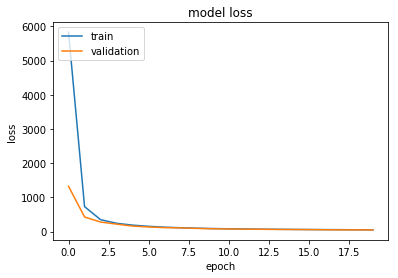

In [ ]:

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

To view the existing graph from saved logs:

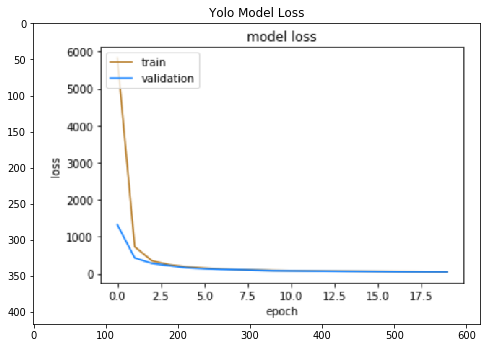

In [ ]:
show_img(cv2.imread(os.path.join(get_parent_dir(0),'Yolo_loss.png')),title='Yolo Model Loss')

In [ ]:
ylogdir=os.path.join(yolo_log_dir).replace("\\", "//").replace(" ", "\\ ")
ylogdir

In [ ]:
model.layers

In [ ]:
# Unfreezing and  training to fine-tune.
#model.load_weights(os.path.join(yolo_log_dir, "checkpoint.h5"))
if True:
    for i in range(len(model.layers)):
        model.layers[i].trainable = True
    model.compile(
        optimizer=Adam(lr=1e-4), loss={"yolo_loss": lambda y_true, y_pred: y_pred},
    )
    print("Unfreeze all layers.")

    batch_size = (
        4
    )
    print(
        "Train on {} samples, val on {} samples, with batch size {}.".format(
            num_train, num_val, batch_size
        )
    )

    history = model.fit_generator(
        data_generator_wrapper(
            lines[:num_train], batch_size, inp_shape, anchors, num_classes
        ),
        steps_per_epoch=max(1, num_train // batch_size),
        validation_data=data_generator_wrapper(
            lines[num_train:], batch_size, inp_shape, anchors, num_classes
        ),
        validation_steps=max(1, num_val // batch_size),
        epochs=epoch1 + epoch2,
        initial_epoch=epoch1,
        callbacks=[logging, checkpoint, reduce_lr, early_stopping],
    )
    model.save_weights(os.path.join(yolo_log_dir, "trained_weights_final.h5"))

print(history.history.keys())


All the layers of the model are unfreezed for fine tuning the network and training is carried out again with batch size 4 and same train/validation split ratio with learning rate 1e-4 for another 20 epochs. This time the learning rate reduction on plateau and early stopping based on validation loss are also included in the callbacks.

In [ ]:

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

To view the existing graph from saved logs:

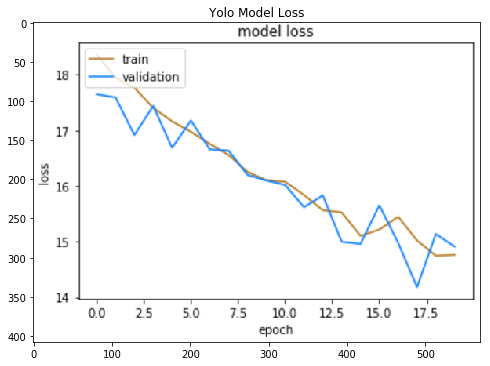

In [ ]:
show_img(cv2.imread(os.path.join(get_parent_dir(0),'Yolo_loss_2.png')),title='Yolo Model Loss')

## Detection
The video file to be tested from the "Test" folder is passed to a Yolo detector which is initialized with the anchors, annotations, required classes, weights of the trained model and scores of all epochs. The detector detects each and every frame of the video and draws bounding boxes around the required classes - Player 1 , Player 2 and Shuttlecock. The resultant video is named "Videoname"_detector.mp4 and placed in the "Test_Results" folder.

In [ ]:
input_paths = GetFileList(image_test_folder)
input_paths

In [ ]:
# Split images and videos
img_end = (".jpg", ".jpg", ".png")
vid_end = (".mp4", ".mpeg", ".mpg", ".avi")
input_image_paths = []
input_video_paths = []
for path in input_paths:
    if path.endswith(img_end):
        input_image_paths.append(path)
    elif path.endswith(vid_end):
        input_video_paths.append(path)

output_path = detection_results_folder
if not os.path.exists(output_path):
    os.makedirs(output_path)


In [ ]:
output_path, input_video_paths, input_image_paths

In [ ]:
# defining YOLO detector
score = 0.25
num_gpu = 1
yolo = YOLO(
    **{
        "model_path": yolo_test_weights,
        "anchors_path": anchors_path,
        "classes_path": YOLO_classname,
        "score": score,
        "gpu_num": num_gpu,
        "model_image_size": (416, 416),
    }
)


In [ ]:
# Dataframe for the prediction outputs
out_df = pd.DataFrame(
    columns=[
        "image",
        "image_path",
        "xmin",
        "ymin",
        "xmax",
        "ymax",
        "label",
        "confidence",
        "x_size",
        "y_size",
    ]
)

# labels to draw on images
class_file = open(YOLO_classname, "r")
input_labels = [line.rstrip("\n") for line in class_file.readlines()]
print("Found {} input labels: {} ...".format(len(input_labels), input_labels))


The below detection can take upto an hour since the video is plit into frames , detected and combined into a video again.

In [ ]:
if input_video_paths:
    print(
        "Found {} videos: {} ...".format(
            len(input_video_paths),
            [os.path.basename(f) for f in input_video_paths[:5]],
        )
    )
    start = timer()
    print(start)
    for i, vpath in enumerate(input_video_paths):
        output_path = os.path.join(
            detection_results_folder,
            os.path.basename(vpath).replace(".", "_detected" + "."),
        )
        detect_video(yolo, vpath, output_path=output_path)

    end = timer()
    print(end)
    print(
        "Processed {} videos in {:.1f} sec".format(
            len(input_video_paths), end - start
        )
    )
# Close the current yolo session
yolo.close_session()


Resulting detected video is stored in Test_Results folder.

# **DETECTION OF HITS AND AWAYS IN THE GAME**

## Data gathering
Approximately 65000 frames from 6 badminton singles match videos were collected and classified as HIT, Serve and AWAY images by manually annotating the frames and classification in a text file in the "annotations/labels" folder.

## MXNet GLUON model and Pytorch model

MXNet framework uses Gluon API which provides numerous models for our requirement to classify HITS and AWAYS out of which we have chosen Denset121 model.

Pytorch also provides good number of models for image classification out of which we have chosen DenseNet161 model.

As we are implementing both of the above models, we get to compare the plots of the above mentioned models in our project for the same problem of classifying HITS and AWAYS in a badminton match video.
 

### Package Installation

---



In [ ]:
!pip install tensorboardX

In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


After checking the nvcc version, please install the corresponding CUDA version for Mxnet - eg cu101 for CUDA version 10.1, cu100 for CUDA version 10.0. The below mentioned packages are for the MXNet Gluon Densenet161 model.

In [ ]:
#!pip install mxnet-cu101
!pip install mxnet
!pip install gluoncv
!pip install gluonnlp
!pip install ffmpeg

### Importing Packages

---



In [ ]:
from absl import app, flags, logging
import cv2
import math
import mxnet as mx
import numpy as np
import os
import random
import gluonnlp
from tqdm import tqdm
#
import glob
from absl.flags import FLAGS
import logging
import multiprocessing
import sys
from tensorboardX import SummaryWriter
import time
import warnings
from mxnet import gluon
from mxnet import autograd as ag
from mxnet.gluon.data.vision import transforms

from gluoncv.utils.metrics.accuracy import Accuracy
#
import pickle as pkl
#
from mxnet.gluon import HybridBlock, nn
from mxnet import ndarray
from mxnet.metric import check_label_shapes
import datetime
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import io
import PIL
from skimage import io
#from IPython.display import Image
import IPython.display as dis
from PIL import Image
from gluoncv.model_zoo import get_model
from mxnet.gluon import nn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from tqdm.notebook import trange, tqdm
from tempfile import TemporaryDirectory
import pdb
from tensorboardX import SummaryWriter
import numpy as np
import torch
import torch.nn as tnn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader

### File Path and constant declaration

---



In [ ]:
# disable autotune
os.environ['MXNET_CUDNN_AUTOTUNE_DEFAULT'] = '0'
lr = 0.001

lr_factor = 0.75
lr_steps_val = [10, 20]
momentum = 0.9
wd = 0.0001
num_gpus = 1
epochs = 1 
batch_size = 64 
stride = 1
padding = 1
split_id = 1
backbone = 'DenseNet121'
data_shape = 224
everyval = [1,1,1]
balanceval = 'True, False, False'
vis = False
max_batches = -1
log_interval = 10 
MxNet_train_model = os.path.join(get_parent_dir(0),"models/vision/experiments/0000")
MxNet_result_folder = os.path.join(get_parent_dir(0), "data", "Test_Results")



In [ ]:
every = [int(s) for s in everyval]
balance = [True if s.lower() == 'true' or s.lower() == 't' else False for s in balanceval]
lr_steps = [int(s) for s in lr_steps_val]
#num_workers = multiprocessing.cpu_count()
num_workers = 1 
#ctx = [mx.gpu(i) for i in range(num_gpus)] # if not working on gpu, mx.cpu()
ctx=mx.cpu(0)
jitter_param = 0.4
lighting_param = 0.1
transform_train = None
transform_test = None
balance_train = True


In [ ]:
# Set up logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)
log_file_path = os.path.join(get_parent_dir(0),'models', 'vision', 'experiments', '0000', 'log.txt')
log_dir = os.path.dirname(log_file_path)
if log_dir and not os.path.exists(log_dir):
    os.makedirs(log_dir)
fh = logging.FileHandler(log_file_path)
logger.addHandler(fh)

# set up tensorboard summary writer
tb_sw = SummaryWriter(log_dir=os.path.join(log_dir, 'tb'), comment='Hits')
tb_sw_pyt = SummaryWriter(log_dir=os.path.join(log_dir, 'tbpyt'), comment='Hits')

### Class definitions

---




In [ ]:
#Metrics PRF1 class
class PRF1(mx.metric.EvalMetric):

    def __init__(self, axis=1, name='prf1', output_names=None, label_names=None):
        """
        Computes the per class precision, recall and F1 scores

        Args:
            axis (int): The axis that represents classes (default is 1)
            name (str): Name of this metric instance for display (default is 'prf1')
            output_names (list of str): Name of predictions that should be used when updating with update_dict
            label_names (list of str): Name of labels that should be used when updating with update_dict (required)
        """
        super(PRF1, self).__init__(name, axis=axis, output_names=output_names, label_names=label_names)
        assert label_names is not None, 'label_names cant be None'
        self.axis = axis
        self.label_names = label_names
        self.scores = np.zeros((3, len(label_names)))
        self.mat = np.zeros((len(label_names), len(label_names)))

    def update(self, labels, preds):
        """
        Update the metric state

        """

        labels, preds = check_label_shapes(labels, preds, True)

        for label, pred_label in zip(labels, preds):
            if pred_label.shape != label.shape:
                pred_label = ndarray.argmax(pred_label, axis=self.axis)
            pred_label = pred_label.asnumpy().astype('int32')
            label = label.asnumpy().astype('int32')

            labels, preds = check_label_shapes(label, pred_label)

            for i in range(len(labels)):
                self.mat[labels[i], preds[i]] += 1

            for i, _ in enumerate(self.label_names):
                predictions = (preds.reshape(-1, 1) == i).all(axis=-1)
                positives = (labels.reshape(-1, 1) == i).all(axis=-1)
                matches = np.logical_and(predictions, positives)

                self.scores[0, i] += matches.sum()
                self.scores[1, i] += positives.sum()
                self.scores[2, i] += predictions.sum()

    def get(self):
        """
        Get the metric values

        Returns:
            scores (list of tuples): of from (str: name, float: value)

        """
        scores = []
        avg_prec = []
        avg_rec = []
        avg_f1 = []
        for i, c in enumerate(self.label_names):
            prec = self.scores[0][i] / (self.scores[1][i] + np.finfo(float).eps)
            rec = self.scores[0][i] / (self.scores[2][i] + np.finfo(float).eps)
            f1 = 2 * (prec * rec) / (prec + rec + np.finfo(float).eps)

            scores.append((c+'_prec', prec))
            scores.append((c+'_rec', rec))
            scores.append((c+'_f1', f1))

            avg_prec.append(prec)
            avg_rec.append(rec)
            avg_f1.append(f1)

        scores.append(('AVG_prec', sum(avg_prec) / len(avg_prec)))
        scores.append(('AVG_rec', sum(avg_rec) / len(avg_rec)))
        scores.append(('AVG_f1', sum(avg_f1) / len(avg_f1)))
        scores.append(('AVG_NB_prec', sum(avg_prec[1:]) / len(avg_prec[1:])))
        scores.append(('AVG_NB_rec', sum(avg_rec[1:]) / len(avg_rec[1:])))
        scores.append(('AVG_NB_f1', sum(avg_f1[1:]) / len(avg_f1[1:])))

        return scores

    def reset(self):
        """
        Reset the metric state
        """
        self.scores = np.zeros((3, len(self.label_names)))
        self.mat = np.zeros((len(self.label_names), len(self.label_names)))

In [ ]:
#FrameWise Model
class FrameModel(HybridBlock):
    def __init__(self, backbone, num_classes=-1, swap=False, **kwargs):
        """
        A framewise model (just the backbone CNN with a single dense layer to the classes)

        Args:
            backbone: the backbone CNN model
            num_classes (int): the number of classes
        """
        super(FrameModel, self).__init__(**kwargs)
        self.swap = swap
        with self.name_scope():
            self.backbone = backbone
            self.classes = None
            if num_classes > 0:
                self.classes = nn.Dense(num_classes, flatten=True)

    def hybrid_forward(self, F, x):
        if self.swap:
            x = F.swapaxes(x, 1, 2)
        x = self.backbone(x)
        if self.classes:
            x = self.classes(x)
        return x


In [ ]:
#Dataset Class
class BadmintonSet(Dataset):
    def __init__(self, root='data', transform=transforms.ToTensor(),
                 split='train', every=1, balance=True, padding=1,
                 stride=1, model_id='0000', inference=False):
        self._root = os.path.join(get_parent_dir(0),root)
        # self._captions = captions
        self._split = split
        self._balance = balance
        self._every = every  # only get every nth frame from a video
        self._padding = padding  # temporal padding around event boundaries
        self._stride = stride  # temporal stride for frame sampling
        self._transform = transform
        self._inference = inference
        self._videos_dir = os.path.join(self._root, "MXNetvideos")
        self._frames_dir = os.path.join(self._root, "MXNetframes")
        self._splits_dir = os.path.join(self._root, "splits")
        self._annotations_dir = os.path.join(self._root, "annotations")
        self._labels_dir = os.path.join(self._root, "annotations", "labels")
        self.output_dir = os.path.join(self._root, "outputs", model_id, split)
        self.classes = self._get_classes()
        self._samples, self._videos, self._events = self.load_data()
        self._video_lengths = self._get_video_lengths()
        if self._balance:
            self._samples = self._balance_classes()

    def __str__(self):
        return '\n\n' + self.__class__.__name__ + '\n' + self.stats() + '\n'

    def stats(self):
        """
        Get a stats string for the dataset

        Returns:
            str: stats string
        """
        output = ''
        output += 'Split: {}\n'.format(self._split)
        classes = self.classes
        frame_counts = [0] * len(classes)
        for s in self._samples:
            frame_counts[classes.index(s[2])] += 1
        event_counts = [0] * len(classes)
        for e in self._events:
            event_counts[classes.index(e[3])] += 1

        output += '{0: <6} {1: <8} {2: <8} {3: <5}\n'.format('Class', '# Frames', '# Events', 'FperE')
        for i, c in enumerate(classes):
            output += '{0: <6} {1: <8} {2: <8} {3: <5}\n'.format(c, frame_counts[i], event_counts[i],
                                                                 int(frame_counts[i] / (event_counts[i] + .00001)))
        return output

    def __len__(self):
        return len(self._samples)

    @staticmethod
    def get_image_path(root_dir, video_name, frame_number, chunk_size=1000):
        chunk = int(frame_number / chunk_size) * chunk_size
        return os.path.join(root_dir, video_name + '.mp4', '{:010d}'.format(chunk), '{:010d}.jpg'.format(frame_number))

    def __getitem__(self, idx):
        sample = self._samples[idx]
        img_path = self.get_image_path(self._frames_dir, sample[0], sample[1]).replace("\\", "/")
        if not self._inference:
            label = self.classes.index(sample[2])
        #img = mx.image.imread(img_path, 1)
        img= Image.open(img_path)
        #print(img)
        if self._transform is not None:
            #print(self._transform)
            img = self._transform(img)
        if not self._inference:
            return img, label, idx
        else:
            return img, idx

    @staticmethod
    def _get_classes():
        """
        Gets a list of class names as specified in the imagenetvid.names file

        Returns:
            list : a list of strings

        """
        names_file = os.path.join(get_parent_dir(0), 'data/classes.names')
        with open(names_file, 'r') as f:
            classes = [line.strip() for line in f.readlines()]
        return classes

    @property
    def num_class(self):
        """Number of categories."""
        return len(self.classes)

    def _balance_classes(self):
        """
        Balance the dataset on 'Other' class, with next most sampled class, uses uniform random sampling

        Returns:
            list: the balanced set of samples
        """
        #
        counts = self.class_counts()
        next_most = max(counts[1:])
        ratio = next_most / float(counts[0] + 1)

        balanced = list()
        for sample in self._samples:
            if sample[2] == 'OTH' and random.uniform(0, 1) > ratio:
                continue
            balanced.append(sample)
        samples = balanced

        return samples

    def class_counts(self):
        """
        Get the sample counts for each class

        Returns:
            list: of ints with length of classes with the sample counts per class
        """
        classes = self.classes
        counts = [0] * len(classes)
        for s in self._samples:
            counts[classes.index(s[2])] += 1  # todo assumes frames at the moment
        return counts

    def load_data(self):
        """
        Load the data

        Returns:
            list: of samples [[video, frame, class], ...]
            list: of videos [video1, video2, ...]
            list: of events [[video, start_frame, last_frame, cur_class], ...]
        """
        splits_file = os.path.join(self._splits_dir, self._split + '.txt')
        #print("splits_file", splits_file)
        # load the splits file
        if os.path.exists(splits_file):
            logging.info("Loading data from {}".format(splits_file))
            with open(os.path.join(self._splits_dir, self._split + '.txt'), 'r') as f:
                lines = f.readlines()
                samples = [[line.rstrip().split()[0], int(line.rstrip().split()[1])] for line in lines]

            # make a list of the videos
            videos = set()
            for s in samples:
                videos.add(s[0])
            videos = list(videos)

            labels = dict()
            for video in videos:
                labels[video] = dict()

            # verify images exist, if not try and extract, if not again then ignore
            for i in range(2):  # go around twice, so if not all samples found extract, then re-check
                samples_exist = list()
                samples_exist_flag = True

                for s in samples:
                    if not os.path.exists(self.get_image_path(self._frames_dir, s[0], s[1])):
                        if i == 0:  # first attempt checking all samples exist, try extracting
                            samples_exist_flag = False  # will flag to extract frames

                            logging.info("{} does not exist, will extract frames."
                                         "".format(self.get_image_path(self._frames_dir, s[0], s[1])))
                            break

                        else:  # second attempt, just ignore samples
                            logging.info("{} does not exist, will ignore sample."
                                         "".format(self.get_image_path(self._frames_dir, s[0], s[1])))
                    else:
                        samples_exist.append(s)

                if samples_exist_flag:  # all samples exist
                    break
                else:
                    for video in videos:  
                        video_to_frames(video_path=os.path.join(self._videos_dir, video + '.mp4'),  # assuming .mp4
                                        frames_dir=self._frames_dir,
                                        chunk_size=1000)

            samples = samples_exist

            # load the class labels for each sample
            if not self._inference:
                for video in videos:
                    with open(os.path.join(self._labels_dir, video + '.txt'), 'r') as f:
                        lines = f.readlines()
                        lines = [l.rstrip().split() for l in lines]

                    for line in lines:
                        labels[video][int(line[0])] = line[1]

            # a dict of the frames in the set for each video
            in_set = dict()
            for video in videos:
                in_set[video] = list()

            #  add class labels to each sample
            if not self._inference:
                for i in range(len(samples)):
                    samples[i].append(labels[samples[i][0]][samples[i][1]])
                    in_set[samples[i][0]].append(samples[i][1])

                # load events (consecutive frames with same class label)
                events = list()
                for video in in_set.keys():
                    cur_class = 'OTH'
                    start_frame = -1
                    for frame in sorted(in_set[video]):
                        if start_frame < 0:
                            start_frame = frame
                            last_frame = frame
                        if labels[video][frame] != cur_class:
                            events.append([video, start_frame, last_frame, cur_class])
                            cur_class = labels[video][frame]
                            start_frame = frame
                        last_frame = frame

                    events.append([video, start_frame, last_frame, cur_class])  # add the last event

            if self._inference:

                return samples, videos, None
            else:

                return samples, videos, events
        else:
            logging.info("Split {} does not exist, please make sure it exists to load a dataset.".format(splits_file))
            return None, None, None

    def _get_video_lengths(self):
        """
        get the video lengths

        :return: the video lengths dictionary
        """
        lengths = dict()
        for sample in self._samples:
            video_name = sample[0]
            if video_name not in lengths:
                largest_dir = sorted(os.listdir(os.path.join(self._frames_dir, video_name + '.mp4')))[-1]
                assert largest_dir.isdigit(), "Expects the directory {} to only contain numbered subdirs".format(
                    os.path.join(self._frames_dir, video_name + '.mp4'))
                largest_file = sorted(os.listdir(os.path.join(self._frames_dir, video_name + '.mp4', largest_dir)))[-1]
                lengths[video_name] = int(largest_file[:-4])

        return lengths

    def save_sample(self, idx, outputs=None):  # todo
        sample = self._samples[idx]
        img_path = self.get_image_path(self._frames_dir, sample[0], sample[1])
        save_img_path = self.get_image_path(self.output_dir, sample[0], sample[1])

        img = cv2.imread(img_path)

        # Save the extracted image
        os.makedirs(os.path.dirname(save_img_path), exist_ok=True)
        cv2.imwrite(save_img_path, img)

  


### Stand Alone Function definitions

---



In [ ]:
def show_img(im, ax=None, figsize=(8,8), title=None):
    if not ax: _,ax = plt.subplots(1,1,figsize=figsize)
    if len(im.shape)==2: im = np.tile(im[:,:,None], 3) 
    ax.imshow(im);
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    if title: ax.set_title(title)
    return ax

In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

The MXNet model training module operates for 20 epochs with batch size of 64 thus dividing the whole training set into 64 batches. The learning rate which starts with 0.001 is reduced by a factor of 0.75 after the 10th and 20th epoch. The frame data and labels are split and the training is carried out. After every 30 batches in each epoch, the training results are printed. Only the accuracy metrics and the average NB F1 score (score which leaves out OTH class) is added to Tensorboard logs. The Avg F1 score provides the scores or each epoch. Once the training is completed, the model parameters and F1 scores are saved for every epoch for detection.

In [ ]:
def train_model(model, train_set, train_data, metrics, val_set, val_data, val_metrics, trainer, loss_fn, start_epoch, ctx, tb_sw=None):
    epochs = 20
    batch_size = 64
    lr_factor = 0.75
    log_interval = 30
    lr_steps_val = [10, 20]
    train_mod_path = os.path.join(get_parent_dir(0),"models/vision/experiments/0000")
    lr_steps = [int(s) for s in lr_steps_val]
    if epochs-start_epoch > 0:
        # Training loop
        lr_counter = 0
        num_batches = int(len(train_set) / batch_size)
        for epoch in range(start_epoch, epochs):  # loop over epochs
            print('[Starting Epoch {}]'.format(epoch))
            if epoch == lr_steps[lr_counter]:
                trainer.set_learning_rate(trainer.learning_rate * lr_factor)
                lr_counter += 1
            tic = time.time()
            train_sum_loss = 0
            for metric in metrics:
                metric.reset()

            for i, batch in enumerate(train_data):  # loop over batches
                # if FLAGS.max_batches > 0 and i > FLAGS.max_batches:
                #     break
                btic = time.time()

                # split data across devices
                data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0, even_split=False)
                labels = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0, even_split=False)

                sum_losses = []
                outputs = []
                with ag.record():
                    for ix, x in enumerate(data):  # loop over devices
                        output = model(x)
                        outputs.append(output)
                        sum_losses.append(loss_fn(output, labels[ix]))

                    ag.backward(sum_losses)

                # stepping the optimizer
                trainer.step(batch_size)

                # storing the epoch loss sums - avg loss across batch (avg across devices)
                train_sum_loss += sum([l.mean().asscalar() for l in sum_losses]) / len(sum_losses)

                # update metric
                for metric in metrics:
                    metric.update(labels, outputs)

                #logging
                if (i + 1) % log_interval==0:
                    str_ = '[Epoch {}][Batch {}/{}], LR: {:.2E}, Speed: {:.3f} samples/sec'.format(
                        epoch, i, num_batches, trainer.learning_rate, batch_size / (time.time() - btic))

                    str_ += ', {}={:.3f}'.format("loss:", train_sum_loss/(i*batch_size))
                    #tb_sw = SummaryWriter()
                    tb_sw.add_scalar(tag='Training_loss',
                                     scalar_value=train_sum_loss / (i * batch_size),
                                     global_step=(epoch * len(train_data) + i))

                    for metric in metrics:
                        result = metric.get()
                        if not isinstance(result, list):
                            result = [result]
                        for res in result:
                            str_ += ', {}={:.3f}'.format(res[0], res[1])
                            if("accuracy" in res[0]):
                              tb_sw.add_scalar(tag='Training_{}'.format(res[0]),
                                             scalar_value=float(res[1]),
                                             global_step=(epoch * len(train_data) + i))

                    print(str_)
            # Formatting end of epoch logging string getting metrics along the way
            str_ = '[Epoch {}]'.format(epoch)

            for metric in metrics:
                result = metric.get()
                if not isinstance(result, list):
                    result = [result]
                for res in result:
                    str_ += ', Train_{}={:.3f}'.format(res[0], res[1])

            str_ += ', loss: {:.3f}'.format(train_sum_loss / len(train_data))

            vtic = time.time()
            _,_,_ = validate_model(model, val_data, val_set, val_metrics, ctx)

            str_2 = 'Val set:'
            for i in range(len(train_set.classes)):
                str_2 += '\n'
                for j in range(len(train_set.classes)):
                    str_2 += str(val_metrics[4].mat[i, j]) + '\t'
            print(str_2)

            for metric in val_metrics:
                result = metric.get()
                if not isinstance(result, list):
                    result = [result]
                for res in result:
                  str_ += ', Val_{}={:.3f}'.format(res[0], res[1])
                  if (("accuracy" in res[0]) or ("loss" in res[0]) or ("AVG_NB_f1" in res[0])):
                    tb_sw.add_scalar(tag='Val_{}'.format(res[0]),
                                         scalar_value=float(res[1]),
                                         global_step=(epoch * len(train_data)))
                  if res[0] == 'AVG_NB_f1':
                     with open(os.path.join(train_mod_path, 'scores.txt'), 'a') as f:
                            f.write(str(epoch) + '\t' + str(float(res[1])) + '\n')

                metric.reset()

            str_ += ', Epoch Time: {:.1f}, Val Time: {:.1f}'.format(time.time() - tic, time.time() - vtic)

            print(str_)
            model.save_parameters(os.path.join(train_mod_path, "{:04d}.params".format(epoch)))
    return model



The validation function serves the MXNet model in providing the validation accuracy of the model on the validation dataset.

In [ ]:
# Validation function
def validate_model(net, loader, dataset, metrics, ctx, vis=False):
    train_mod_path = os.path.join(get_parent_dir(0),"models/vision/experiments/0000")
    results = dict()
    ground_truths = dict()
    for i, batch in tqdm(enumerate(loader), total=len(loader), desc='Testing'):
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0, even_split=False)
        labels = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0, even_split=False)
        idxs = gluon.utils.split_and_load(batch[2], ctx_list=ctx, batch_axis=0, even_split=False)
        outputs = [net(x) for x in data]

        for metric in metrics:
            metric.update(labels, outputs) # only until this in orgcode

        for di in range(len(outputs)):  # loop over devices
            idxs = [int(idx) for idx in idxs[di].asnumpy()]

            output = [o.asnumpy() for o in outputs[di]]
            if isinstance(outputs[0], list) or isinstance(outputs[0], tuple):
                for i in range(len(idxs)):  # loop over samples
                    sample = dataset._samples[idxs[i]]
                    img_path = dataset.get_image_path(dataset._frames_dir, sample[0], sample[1])
                    results[img_path] = [o[i] for o in output]
                    ground_truths[img_path] = dataset.classes.index(sample[2])
                    print('sample: {}, result: {}'.format(sample[1], results[img_path]))
            else:
                for i in range(len(idxs)):  # loop over samples
                    sample = dataset._samples[idxs[i]]
                    img_path = dataset.get_image_path(dataset._frames_dir, sample[0], sample[1])
                    results[img_path] = output[i]
                    ground_truths[img_path] = dataset.classes.index(sample[2])

    if vis:
        visualise_events(dataset, outputs,
                         video_path=os.path.join(train_mod_path, 'results.mp4'))

    return metrics, results, ground_truths


In [ ]:
def extract_frames(video_path, frames_dir, overwrite=False, start=-1, end=-1, every=1):
    """
    Extract frames from a video using OpenCVs VideoCapture

    Args:
        video_path (str): path of the video
        frames_dir (str): the directory to save the frames
        overwrite (bool): to overwrite frames that already exist? (default is False)
        start (int): start frame (default is -1)
        end (int): end frame (default is -1)
        every (int): frame spacing (default is 1)

    Returns:
        int: count of images saved
    """
    print("extract frames")
    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
    frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

    assert os.path.exists(video_path)  # assert the video file exists

    capture = cv2.VideoCapture(video_path)  # open the video using OpenCV

    if start < 0:  # if start isn't specified lets assume 0
        start = 0
    if end < 0:  # if end isn't specified assume the end of the video
        end = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print("end :", end)
    capture.set(1, start)  # set the starting frame of the capture
    frame = start  # keep track of which frame we are up to, starting from start
    while_safety = 0  # a safety counter to ensure we don't enter an infinite while loop (hopefully we won't need it)
    saved_count = 0  # a count of how many frames we have saved

    while frame < end:  # lets loop through the frames until the end

        ret, image = capture.read()  # read an image from the capture
        print("return :", ret)
        if while_safety > 500:  # break the while if our safety maxs out at 500
            break

        # sometimes OpenCV reads None's during a video, in which case we want to just skip
        if ret == 0 or image is None:  # if we get a bad return flag or the image we read is None, lets not save
            while_safety += 1  # add 1 to our while safety, since we skip before incrementing our frame variable
            continue  # skip

        if frame % every == 0:  # if this is a frame we want to write out based on the 'every' argument
            while_safety = 0  # reset the safety count
            # save in start of chunk subdirectory in video name subdirectory
            save_path = os.path.join(frames_dir, video_filename, "{:010d}".format(start), "{:010d}.jpg".format(frame))
            print(save_path)
            if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
                cv2.imwrite(save_path, image)  # save the extracted image
                saved_count += 1  # increment our counter by one

        frame += 1  # increment our frame count

    capture.release()  # after the while has finished close the capture

    return saved_count  # and return the count of the images we saved


In [ ]:
def video_to_frames(video_path, frames_dir, overwrite=False, every=1, chunk_size=1000):
    """
    Extracts the frames from a video using multiprocessing

    Args:
        video_path (str): path to the video
        frames_dir (str): directory to save the frames
        overwrite (bool): overwrite frames if they exist? (default is False)
        every (int): extract every this many frames (default is 1)
        chunk_size (int): how many frames to split into chunks (one chunk per cpu core process) (default is 1000)

    Returns:
        str: path to the directory where the frames were saved, or None if fails
    """

    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
    frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible
    #print(video_path, frames_dir)
    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path
    #print(video_dir, video_filename)
    capture = cv2.VideoCapture(video_path)  # load the video
    total = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))  # get its total frame count
    capture.release()  # release the capture straight away

    if total < 1:  # if video has no frames, might be and opencv error
        print("Video has no frames. Check your OpenCV + ffmpeg installation, can't read videos!!!\n"
              "You may need to install OpenCV by source not pip")
        return None  # return None

    frame_chunks = [[i, i+chunk_size] for i in range(0, total, chunk_size)]  # split the frames into chunk lists
    frame_chunks[-1][-1] = min(frame_chunks[-1][-1], total-1)  # make sure last chunk has correct end frame

    for frame_chunk in frame_chunks:
        # make directory to save frames, its a sub dir in the frames_dir with the video name
        # also since file systems hate lots of files in one directory, lets put separate chunks in separate directories
        os.makedirs(os.path.join(frames_dir, video_filename, "{:010d}".format(frame_chunk[0])), exist_ok=True)

    prefix_str = "Extracting frames from {}".format(video_filename)  # a prefix string to be printed in progress bar

    saved_count = [ extract_frames(video_path, frames_dir, overwrite, f[0], f[1], every) for f in frame_chunks]

    return os.path.join(frames_dir, video_filename)

The test dataset is applied to the MXNet Gluon model for detection which provides the output probabilitites of confirming each of the output classes for the image. The class with the highest probability is chosen as the desired class for the frame.

In [ ]:
#Detect Video
def detect_model(net, loader, dataset, ctx):
    results = dict()
    print("loader length: {}".format(len(loader)))
    for batch in tqdm(loader, total=len(loader), desc='Evaluating'):
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0, even_split=False)
        idxs = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0, even_split=False)
        outputs = [net(x) for x in data]

        for di in range(len(outputs)):  # loop over devices
            idxs = [int(idx) for idx in idxs[di].asnumpy()]

            output = [o.asnumpy() for o in outputs[di]]
            if isinstance(outputs[0], list) or isinstance(outputs[0], tuple):
                for i in range(len(idxs)):  # loop over samples
                    sample = dataset._samples[idxs[i]]
                    img_path = dataset.get_image_path(dataset._frames_dir, sample[0], sample[1])
                    results[img_path] = [o[i] for o in output]
                    print('sample: {}, result: {}'.format(sample[1], results[img_path]))
            else:
                for i in range(len(idxs)):  # loop over samples
                    sample = dataset._samples[idxs[i]]
                    img_path = dataset.get_image_path(dataset._frames_dir, sample[0], sample[1])
                    results[img_path] = output[i]

    return results

The detection function is for Pytorch model.

In [ ]:
# # #Detect Video
def detect_model_pytorch(net, loader, dataset, ctx):
   # store requires_grad and network mode
    #training_stored = net.training
    net.eval()
    rq_stored = []
    for p in net.parameters():
        rq_stored.append(p.requires_grad)
        p.requires_grad = False
    if torch.cuda.device_count() > 1:
	      net= tnn.DataParallel(net)
    net.to(ctx)
    results = dict()
    print("loader length: {}".format(len(loader)))
    dl_it = iter(loader)
    for batch in tqdm(dl_it, total=len(dl_it), leave=False):
        data = batch[0].to(ctx)
        idxs= batch[1]           
        outputs = net(data)
        for di in range(len(outputs)):  # loop over devices
            sample = dataset._samples[int(idxs[di].detach().cpu().numpy())]
            img_path = dataset.get_image_path(dataset._frames_dir, sample[0], sample[1])
            results[img_path] = outputs[di].detach().cpu().numpy()
        for p,rq in zip(net.parameters(), rq_stored): p.requires_grad = rq
    return results



The below visualisation function is applicable for MXNet Gluon and Pytorch models. The function makes a video out of the set of output frames from detection method with colour codes for each of the output classes being highlighted as per the detection.

In [ ]:
#Visualise Results

def visualise_events(dataset, results, video_path, gt=None, max=-1):
    COLOURS = ((148, 148, 148),
               (255, 176, 143), (214, 127, 235), (143, 195, 255), (142, 235, 164), (255, 243, 140),
               (255, 214, 148), (235, 131, 154), (162, 147, 255), (145, 235, 223), (208, 255, 145))

    banner_height = 75
    gt_height = 0
    pred_border = 4
    cls_banner_height = 40

    if gt is not None:
        gt_height = 15

    classes = dataset.classes
    order = sorted(list(results.keys()))

    if max > 0:
        order = order[:min(len(order), max)]

    height, width, _ = cv2.imread(order[0]).shape

    cls_width = int(width / len(classes))

    video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), 30,
                            (width, height + banner_height + cls_banner_height))

    canvas = np.zeros((height + banner_height + cls_banner_height, width, 3), dtype=np.uint8)

    for i, path in tqdm(enumerate(order), total=len(order), desc='Generating Vis'):
        assert os.path.exists(path)
        img = cv2.imread(path)
      # #added for start and end time 
        timefont = cv2.FONT_HERSHEY_COMPLEX_SMALL
        DateTime = str(datetime.datetime.now())
        img = cv2.putText(img, DateTime, (10, 105), timefont, 1,
                                (0, 255, 255), 2, cv2.LINE_8)
        canvas[:height, :, :] = img
        canvas[height:height + banner_height, :width - 1, :] = canvas[height:height + banner_height, 1:, :]

        res = results[path]
        ind = np.argmax(res)
        prob = np.max(res)
        bar_height = int((banner_height - gt_height) * prob)

        canvas[height:height + banner_height, width - 1:width, :] = (0, 0, 0)
        canvas[height + banner_height - bar_height - gt_height:height + banner_height - gt_height, width - 1:width, :] = \
        COLOURS[ind]

        if gt:
            gtp = gt[path]
            canvas[height + banner_height - int(gt_height * .9):height + banner_height - int(gt_height * .3),
            width - 1:width, :] = COLOURS[gtp]

        for c, cls in enumerate(classes):
            clsprev = 'OTH'  
            if ind == c:

                if gt is not None:
                    if ind == gtp:
                        canvas[height + banner_height + 2:, c * cls_width:(c + 1) * cls_width, :] = (0, 255, 0)
                    else:
                        canvas[height + banner_height + 2:, c * cls_width:(c + 1) * cls_width, :] = (0, 0, 255)
                else:
                    canvas[height + banner_height + 2:, c * cls_width:(c + 1) * cls_width, :] = (0, 0, 0)

                canvas[height + banner_height + 2 + pred_border:-pred_border,
                c * cls_width + pred_border:(c + 1) * cls_width - pred_border, :] = COLOURS[c]
            else:
                canvas[height + banner_height + 2:, c * cls_width:(c + 1) * cls_width, :] = COLOURS[c]
            canvas = cv2.putText(canvas, cls,
                                 (int((c + 0.5) * cls_width - 22), height + banner_height + cls_banner_height - 12),
                                 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1, cv2.LINE_AA)

        video.write(canvas)


    video.release()


The below methods provide freezing functionality to train particular layers of the Pytorch model.

In [ ]:

def freeze(model, fr=True):
    child = list(model.children())
    for c in child: freeze(c, fr)
    if not child and not isinstance(model, tnn.modules.batchnorm.BatchNorm2d):
        for p in model.parameters(): 
#             print('---\n', md, p.requires_grad)
            p.requires_grad = not fr

In [ ]:
def freeze_to(model, ix=-1, fr=True):
    child_all = list(model.children())
    for child in child_all[:ix]:
        freeze(child, fr)

The functions one_epoch() and fit() are the training functions for Pytorch model where we pass the training dataloader with batch size of 64 to train only the classifier layer, followed by training the same dataset again by unfreezing all the model layers with batch size of 8 since we require sufficient GPU power to execute the training. The loss and accuracy are returned as a list  for each batch of the dataloader, whose mean is then computed after every epoch to plot the loadd and accuracy graph.

In [ ]:
def one_epoch(net, loss, dl, tb_sw_pyt, opt=None, metric=None):
    
    if opt:
        net.train() 
    else:
        net.eval()
        grad_stored = []
        for p in net.parameters():
            grad_stored.append(p.requires_grad)
            p.requires_grad = False
    
    Loss, Metric = [], []
    dl_it = iter(dl)
    for xb, yb, _ in tqdm(dl_it, leave=False):
        xb, yb = xb.cuda(), yb.cuda()
        y_ = net(xb)
        l = loss(y_, yb)
        if opt:
            net.zero_grad()
            l.backward()
            opt.step()
        Loss.append(l.detach().cpu().numpy())
        if metric: Metric.append(metric(y_, yb).cpu().numpy())
        
    if not opt:
        for p,grad in zip(net.parameters(), grad_stored): p.requires_grad = grad     
    return Loss, Metric    

In [ ]:
accuracy = lambda y_,yb: (y_.max(dim=1)[1] == yb).float().mean()

The below fit() method is the traing function for Pytorch DenseNet161 model. The learning rate used is 0.003, weight decay is 0.0001 and epoch count is 20. The fit() method is invoked twice - once by unfreezing only the last layer of the model, and the other time by unfreezing all the model layers.

In [ ]:
def fit(net, tr_dl, val_dl, tb_sw_pyt, loss=tnn.CrossEntropyLoss(), epochs=3, lr=3e-3, wd=1e-3, plot=True, resume=False):   
    PATH = os.path.join(log_dir, 'tbpyt','densenet_chkpoint.pth')
    opt = optim.Adam(net.parameters(), lr=lr, weight_decay=wd)
    #scheduler=optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=5, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)   
    Losstr_hist, Lossval_hist = [], []
    if resume:
      checkpoint = torch.load(PATH)
      net.load_state_dict(checkpoint['model_state_dict'])
      opt.load_state_dict(checkpoint['optimizer_state_dict'])
      chkepoch = checkpoint['epoch']
      #scheduler.load_state_dict(checkpoint['scheduler'])
    for epoch in trange(epochs): 
        if resume:
          epoch= chkepoch       
        Losstr,  _    = one_epoch(net, loss, tr_dl, tb_sw_pyt, opt)
        Lossval, Accval = one_epoch(net, loss, val_dl, tb_sw_pyt, None, accuracy)
        #scheduler.step(np.mean(Lval))
        Losstr_hist.append(np.mean(Losstr))
        Lossval_hist.append(np.mean(Lossval))
        print(f'epoch: {epoch}\ttraining_loss: {np.mean(Losstr):0.4f}\tvalidation_loss: {np.mean(Lossval):0.4f}\tvalidation_accuracy: {np.mean(Accval):0.2f}')
        #if tb_sw_pyt:
        tb_sw_pyt.add_scalar('training_loss',
                              np.mean(Losstr),
                              epoch * len(tr_dl))
        tb_sw_pyt.add_scalar('Validation_loss',
                              np.mean(Lossval),
                              epoch * len(val_dl))
        tb_sw_pyt.add_scalar('Validation_accuracy',
                              np.mean(Accval),
                              epoch * len(val_dl))
        if epoch == 10:
          torch.save({
            'epoch': epoch,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': opt.state_dict()
            #'scheduler': scheduler.state_dict()
            }, PATH)
    # plot the losses     
    if plot:
        _,ax = plt.subplots(1,1,figsize=(16,4))
        ax.plot(1+np.arange(len(Losstr_hist)),Losstr_hist)
        ax.plot(1+np.arange(len(Lossval_hist)),Lossval_hist)
        ax.grid('on')
        ax.set_xlim(left=1, right=len(Losstr_hist))
        ax.legend(['training loss', 'validation loss']);
        
    return Losstr_hist, Lossval_hist

### Data Pre-processing

The manually annotated data is pre processed to augment the images to increase  accuracy of the model. The training and validation/test image transformations vary such that the training transformations include colour jitter, flipping, random lighting transformations etc for a good training whereas test transformations include center crop only and no more augmentations . The normalization factor is the same as the pre trained model from MxNet gluoncv model zoo as well as Pytorch as they are pre trained on ImageNet dataset.

In [ ]:
# Data augmentation

transform_train = transforms.Compose([
    transforms.RandomCrop(data_shape),
    transforms.ColorJitter(hue=.05, saturation=.05),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.CenterCrop(data_shape),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



The training and validation datasets are defined through the class BadmintonSet. The training and validation datasets are picked from the files "train.txt", "test.txt" in the folder "splits" which have the videofile name and frame names recorded. The transformations for the training and test data are passed to the constructor of the dataset Class for application of the same for training. The training data is balanced for number of samples for each class to avoid overfitting/underfitting.

In [ ]:
#Training and Validation dataset initiated
batch_size
train_set = BadmintonSet(split='train', transform=transform_train, every=every[0], padding=padding, stride=stride, model_id='0000', balance=balance_train)

val_set = BadmintonSet(split='val', transform=transform_test, every=every[1], padding=padding, stride=stride, model_id='0000', balance=False)

train_data = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)

val_data = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0) 



I0602 10:38:49.408723 140567854454656 <ipython-input-18-257becfad477>:143] Loading data from /content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/splits/train.txt
I0602 10:39:03.906752 140567854454656 <ipython-input-18-257becfad477>:143] Loading data from /content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/splits/val.txt


## PYTORCH

Deep learning projects are facilitated by Pytorch which is a library for python programming. Deep leanring models are expressed in idiomatic Python with the use of Pytorch which emphasises flexibility. Pytorch supports dynamic computation graphs where network behaviour changes are captured on the fly unlike the static graphs in frameworks like Tensorflow.

**TorchScript**

---



Serializable and optimizable models can be created wth the help of Torchscript. The trained models can be executed independently in Python. The Torch package houses data structures for tensors and definition of mathematical operations over them.  Many utilities are provided for efficient serialization of of Tensors and arbitrary types.The CUDA counterpart allows the tensors to be computed on GPU

**Tensors**

---


Tensors resemble Numpy ndarrays with the additional facility to operate on GPU. This makes Pytorch a go-to library for implementation of models. PyTorch supports multiple types of tensors, including:

* FloatTensor: 32-bit float
* DoubleTensor: 64-bit float
* HalfTensor: 16-bit float
* IntTensor: 32-bit int
* LongTensor: 64-bit int

PyTorch makes it easy to switch between GPU and CPU. The following are some important modules in Pytorch:

**Autograd module**


---


PyTorch uses a method called automatic differentiation. All the performed operations are recorded by a recorder and replayed backward to compute gradients.This is useful to reduce the time consumption for one epoch by calculating the drivatives of the parameters in forward pass.

**Optim module**

---


The module has inbuilt code for the majority of optimizers used in building a neural network. They can be directly imported and used to build models.


**nn module**

---


As already studied, autograd makes it convienient to implement computationl graphs and compute gradients, however raw autograd is considers low-level for complex neural networks. In such cases wherein we design a complex network, nn module can be used which houses the definition of a set of functions, like the layers of neural network which takes the previous state outputs as inputs and produces the corresponding output thus feeding it to the next layer for processing.

Pytorch follows immediate execution technique by default which is also referred to as Eager Mode. If problem arises in execution of the expression, the method is useful because all the Python elements, say Interpreter, debugger and other tools have direct access to the objects involved thus paving a way to resolve the issue. 

### Densenet Model:

Traditional convolutional networks with L layers have L connections between subsequent layers. However, Densenet network has L(L+1)/2 direct connections. Each layer takes the feature maps of the previous layer as input and feeds its own feature maps as input to the subsequent layer. The main advantages of DenseNet network are:

* Prevention of vanishing-gradient problem
* Feature propagation 
* Feature reuse
* Reduction in number of parameters


<img src="https://drive.google.com/uc?id=10CNcNTNF402VIkQdpZeeiUbLYkfK_-z2" width=700 height=300></img>)




### Model Definition - Pytorch


---


We download the pre trained DenseNet161 model which has multiple densenet blocks and multiple layers in each block. We modify the number of last layers with the number of classes for our model.

In [ ]:
densenet = models.densenet161(pretrained=True)
densenet

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
densenet.classifier = tnn.Linear(2208, 6)
densenet

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
train_set._samples[0]

['Video3', 61, 'HIT_F']

### Training Phase - Pytorch

This takes more than 24 hours to complete the below 3 training modules. The steps can be skipped if required and the rest of the notebook can be executed without issues.

In [ ]:
freeze_to(densenet, -1, True)

epoch: 0	training_loss: 1.3391	validation_loss: 1.8489	validation_accuracy: 0.09


epoch: 1	training_loss: 1.2180	validation_loss: 1.3901	validation_accuracy: 0.29


epoch: 2	training_loss: 1.1668	validation_loss: 1.2061	validation_accuracy: 0.36


epoch: 3	training_loss: 1.1371	validation_loss: 1.4607	validation_accuracy: 0.14


epoch: 4	training_loss: 1.1111	validation_loss: 1.4117	validation_accuracy: 0.24


epoch: 5	training_loss: 1.1219	validation_loss: 1.3884	validation_accuracy: 0.40


epoch: 6	training_loss: 1.0993	validation_loss: 1.2657	validation_accuracy: 0.29


epoch: 7	training_loss: 1.0734	validation_loss: 1.3238	validation_accuracy: 0.32


epoch: 8	training_loss: 1.0823	validation_loss: 1.6835	validation_accuracy: 0.26


epoch: 9	training_loss: 1.0819	validation_loss: 1.2712	validation_accuracy: 0.24


epoch: 10	training_loss: 1.0785	validation_loss: 1.2420	validation_accuracy: 0.22


epoch: 11	training_loss: 1.0691	validation_loss: 1.0273	validation_accuracy: 0.51


epoch: 12	training_loss: 1.0623	validation_loss: 1.1332	validation_accuracy: 0.35


epoch: 13	training_loss: 1.0628	validation_loss: 1.2940	validation_accuracy: 0.27


epoch: 14	training_loss: 1.0671	validation_loss: 1.1317	validation_accuracy: 0.36


epoch: 15	training_loss: 1.0607	validation_loss: 1.2636	validation_accuracy: 0.31


epoch: 16	training_loss: 1.0513	validation_loss: 1.7471	validation_accuracy: 0.23


epoch: 17	training_loss: 1.0707	validation_loss: 1.2805	validation_accuracy: 0.30


epoch: 18	training_loss: 1.0756	validation_loss: 1.2587	validation_accuracy: 0.25


epoch: 19	training_loss: 1.0619	validation_loss: 1.2389	validation_accuracy: 0.34



/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


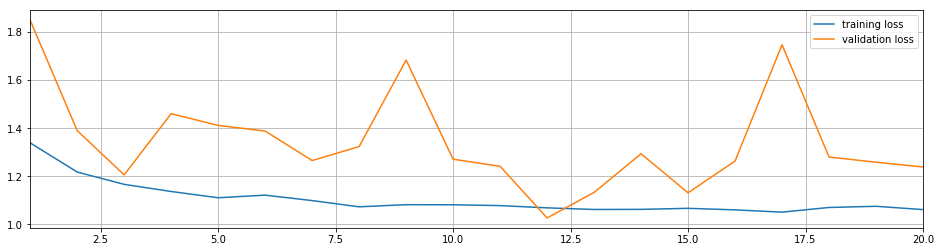

In [ ]:
fit(densenet.cuda(), train_data, val_data, tb_sw_pyt, epochs=20, resume=False);
PATH = os.path.join(log_dir, 'tbpyt','densenet_weights.pth')
torch.save(densenet.state_dict(), PATH)

If training is not executed, the plot can be seen here:

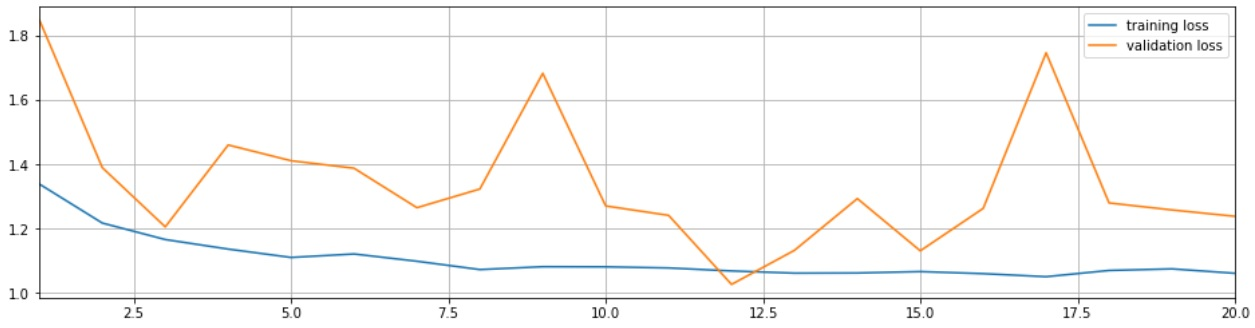

In [ ]:
dis.Image(os.path.join(get_parent_dir(0), "Pytorch_LastLayer.jpg"))

In [ ]:
freeze(densenet, False)
for param in densenet.parameters():
    print(param.requires_grad)

epoch: 0	training_loss: 1.3423	validation_loss: 1.9709	validation_accuracy: 0.07


epoch: 1	training_loss: 1.2514	validation_loss: 1.4466	validation_accuracy: 0.21


epoch: 2	training_loss: 1.2022	validation_loss: 1.3790	validation_accuracy: 0.22


epoch: 3	training_loss: 1.2032	validation_loss: 1.7810	validation_accuracy: 0.17


epoch: 4	training_loss: 1.1683	validation_loss: 1.9348	validation_accuracy: 0.19


epoch: 5	training_loss: 1.1569	validation_loss: 1.3671	validation_accuracy: 0.26


epoch: 6	training_loss: 1.1607	validation_loss: 1.9389	validation_accuracy: 0.14


epoch: 7	training_loss: 1.1470	validation_loss: 1.2545	validation_accuracy: 0.39


epoch: 8	training_loss: 1.1547	validation_loss: 1.9655	validation_accuracy: 0.17


epoch: 9	training_loss: 1.1353	validation_loss: 1.5415	validation_accuracy: 0.20


epoch: 10	training_loss: 1.1332	validation_loss: 1.8893	validation_accuracy: 0.22


epoch: 11	training_loss: 1.1256	validation_loss: 1.4584	validation_accuracy: 0.27


epoch: 12	training_loss: 1.1425	validation_loss: 1.4901	validation_accuracy: 0.28


epoch: 13	training_loss: 1.1245	validation_loss: 1.5943	validation_accuracy: 0.22


epoch: 14	training_loss: 1.1171	validation_loss: 1.5729	validation_accuracy: 0.24


epoch: 15	training_loss: 1.1230	validation_loss: 1.7925	validation_accuracy: 0.15


epoch: 16	training_loss: 1.1159	validation_loss: 2.0059	validation_accuracy: 0.22


epoch: 17	training_loss: 1.0919	validation_loss: 1.4607	validation_accuracy: 0.26


epoch: 18	training_loss: 1.1008	validation_loss: 1.1662	validation_accuracy: 0.43


epoch: 19	training_loss: 1.1110	validation_loss: 1.0218	validation_accuracy: 0.57



/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


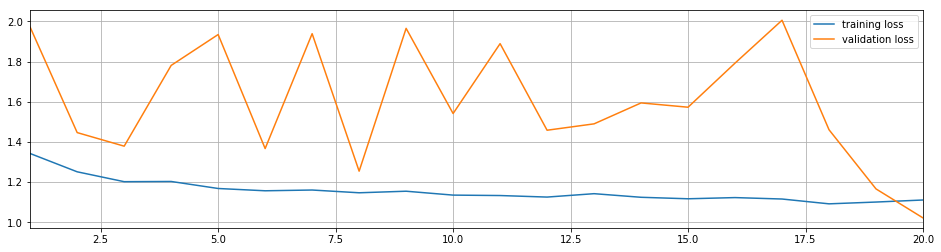

In [ ]:
#fine tuning with all layers unfreezed:

fit(densenet.cuda(), train_data, val_data, tb_sw_pyt, epochs=20, lr=0.0001, resume=False);
PATH = os.path.join(log_dir, 'tbpyt','densenet_weights_final.pth')
torch.save(densenet.state_dict(), PATH)

If training is not executed, the plot can be seen here:

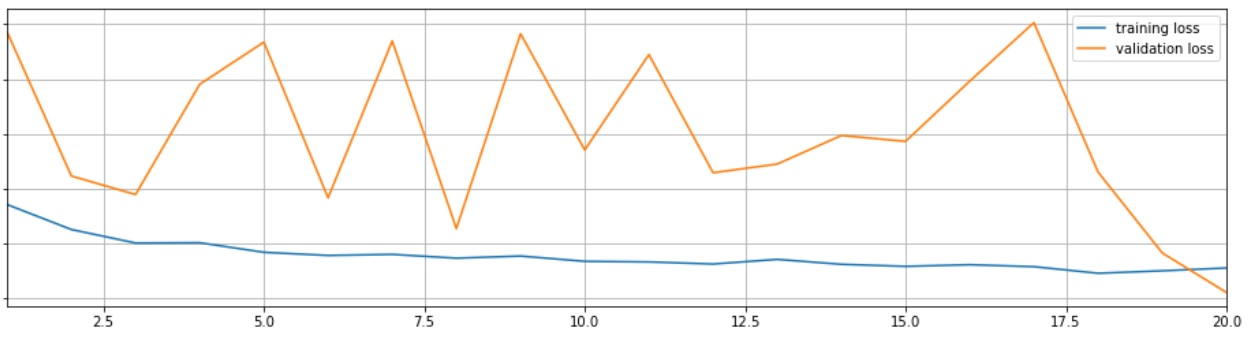

In [ ]:
dis.Image(os.path.join(get_parent_dir(0), "Pytorch_allLayers.jpg"))

The below training is conducted by incorporating LR scheduler in fit() method but it proves in vain since the training and validation loss plots do not converge at all. Hence we ignore this result and undo the learning scheduler addition in fit() method

epoch: 0	training_loss: 1.0951	validation_loss: 1.7342	validation_accuracy: 0.19


epoch: 1	training_loss: 1.0969	validation_loss: 1.7588	validation_accuracy: 0.25


epoch: 2	training_loss: 1.0918	validation_loss: 1.4694	validation_accuracy: 0.21


epoch: 3	training_loss: 1.0852	validation_loss: 1.6790	validation_accuracy: 0.21


epoch: 4	training_loss: 1.0840	validation_loss: 1.5405	validation_accuracy: 0.22


epoch: 5	training_loss: 1.0704	validation_loss: 1.4905	validation_accuracy: 0.26


epoch: 6	training_loss: 1.0742	validation_loss: 1.5002	validation_accuracy: 0.27


epoch: 7	training_loss: 1.0590	validation_loss: 1.8480	validation_accuracy: 0.28


epoch: 8	training_loss: 1.0649	validation_loss: 1.6727	validation_accuracy: 0.20


epoch: 9	training_loss: 1.0234	validation_loss: 1.6205	validation_accuracy: 0.31


epoch: 10	training_loss: 1.0055	validation_loss: 1.7696	validation_accuracy: 0.31


epoch: 11	training_loss: 0.9876	validation_loss: 1.5656	validation_accuracy: 0.32


epoch: 12	training_loss: 0.9822	validation_loss: 1.6150	validation_accuracy: 0.33


epoch: 13	training_loss: 0.9716	validation_loss: 1.6122	validation_accuracy: 0.29


epoch: 14	training_loss: 0.9700	validation_loss: 1.6390	validation_accuracy: 0.32


epoch: 15	training_loss: 0.9661	validation_loss: 1.5734	validation_accuracy: 0.35


epoch: 16	training_loss: 0.9631	validation_loss: 1.6390	validation_accuracy: 0.33


epoch: 17	training_loss: 0.9702	validation_loss: 1.7773	validation_accuracy: 0.31


epoch: 18	training_loss: 0.9662	validation_loss: 1.6746	validation_accuracy: 0.34


epoch: 19	training_loss: 0.9655	validation_loss: 1.6737	validation_accuracy: 0.36



/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


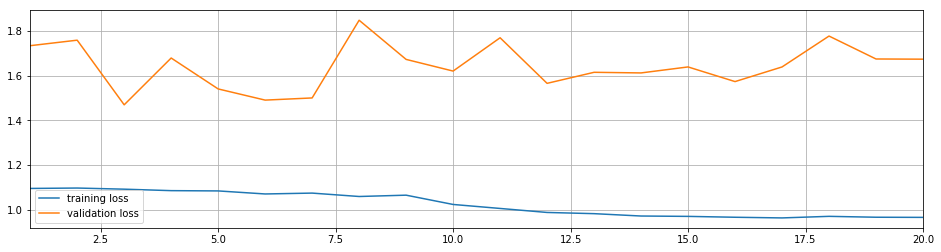

In [ ]:
# freeze(densenet, False)
# fit(densenet.cuda(), train_data, val_data, tb_sw_pyt, epochs=20, lr=0.0001, resume=False);
# PATH = os.path.join(log_dir, 'tbpyt','densenet_weights_sched.pth')
# torch.save(densenet.state_dict(), PATH)

If training is not executed, the plot can be seen here:

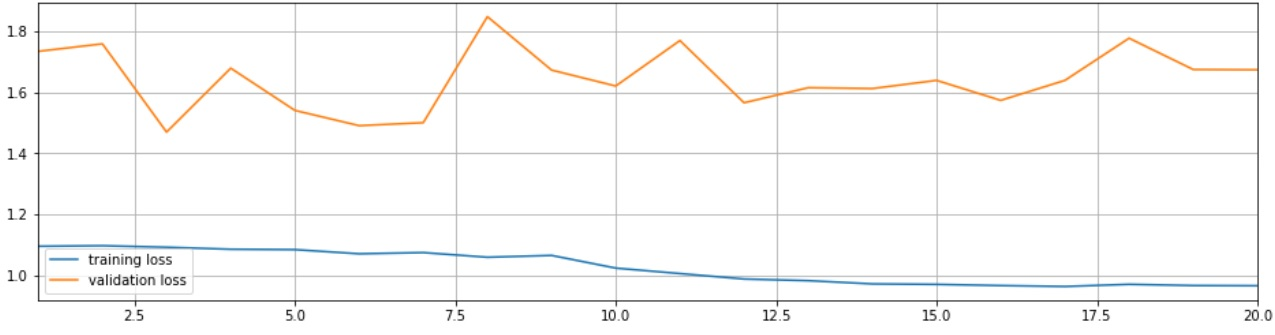

In [ ]:
dis.Image(os.path.join(get_parent_dir(0), "Pytorch_AllLayers_sched.jpg"))

In [ ]:
PATH = os.path.join(log_dir, 'tbpyt','densenet_weights_final.pth')
densenet.load_state_dict(torch.load(PATH))

In [ ]:
train_set.classes

['OTH', 'SERVE_N', 'SERVE_F', 'HIT_N', 'HIT_F', 'AWAY']

In [ ]:
classes = train_set.classes

Images and their groundtruths/predictions visualised for 2 batches:

---


W0602 08:45:50.273032 140567854454656 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


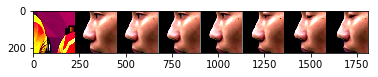

I0602 08:45:50.420017 140567854454656 summary.py:41] Summary name GT Images Batch 1 is illegal; using GT_Images_Batch_1 instead.


GroundTruth:    OTH   OTH   OTH   OTH   OTH   OTH   OTH   OTH
Prediction:    OTH SERVE_N SERVE_N SERVE_N SERVE_N SERVE_N SERVE_N SERVE_N


In [ ]:
#Batch 1
dataiter = iter(val_data)
images, labels,_ = dataiter.next()
grid= torchvision.utils.make_grid(images)
imshow(grid)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))
tb_sw_pyt.add_image('GT Images Batch 1', grid, 0)
tb_sw_pyt.add_text('GT Batch 1 ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

outputs = densenet(images)
_, predicted = torch.max(outputs, 1)
print('Prediction: ', ' '.join('%5s' % classes[predicted[j]] for j in range(8)))
tb_sw_pyt.add_text('Prediction Batch 1 ', ' '.join('%5s' % classes[predicted[j]] for j in range(8)))

W0602 08:46:38.451652 140567854454656 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


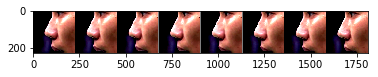

I0602 08:46:38.609718 140567854454656 summary.py:41] Summary name GT Images Batch 2 is illegal; using GT_Images_Batch_2 instead.


GroundTruth:    OTH   OTH   OTH   OTH   OTH   OTH   OTH   OTH
Prediction:    OTH   OTH   OTH   OTH   OTH   OTH   OTH   OTH


In [ ]:
#Batch 2

images, labels,_ = dataiter.next()
grid=torchvision.utils.make_grid(images)
imshow(grid)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))
tb_sw_pyt.add_image('GT Images Batch 2', grid, 1)
tb_sw_pyt.add_text('GT Batch 2 ', ' '.join('%5s' % classes[labels[j]] for j in range(8)) )
outputs = densenet(images)
_, predicted = torch.max(outputs, 1)
print('Prediction: ', ' '.join('%5s' % classes[predicted[j]] for j in range(8)))
tb_sw_pyt.add_text('Prediction Batch 2 ', ' '.join('%5s' % classes[predicted[j]] for j in range(8)) )

### Validation Phase - Pytorch

The below snippet finds the accuracy of the model with manual calculation on validation dataset.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in val_data:
        images, labels, _ = data
        outputs = densenet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on %d validation images: %d %%' % (total,
    (100 * correct / total)))

Accuracy of the network on 10565 validation images: 74 %



We see that the validation accuracy has crossed 0.57 as per the plot and 0.74 as per manual calculation which includes  all the target classes.

## MXNET GLUON MODEL

Apache MXNet

---

Apache MXNet is an open-source deep learning software framework used in training and deployment of deep neural networks.This can be used to combine flavours of deep learning programs to maximize the efficiency and productivity. MXNet framework provides excellent scalability, good auto-differentiation, and great support for CUDA GPUs.


Gluon API

---

The Gluon library in MXNet constitutes a simple, concise API for deep learning. The API makes it easy to construct and train deep learning models without compromising on the training speed. MXNet competes with Tensorflow and PyTorch in developing deep learnining models due to the assition of Gluon API. 



Gluon model zoo

---

The Gluon Model Zoo provides a collection of off-the-shelf models which can be used for building deep learning models. Transfer learning is made feasible in MXNet Gluon models with the help of pretrained models which can be run in CPU or GPU with own dataset. Our project makes use of pretrained model DenseNet121 from the Gluon Model Zoo for image classification. This network accepts images in the BatchSize x 3 x 224 x 224. 224 x 224 is the image resolution and 3 is the number of channels(RGB). The pre trained weights are used as intitialisation to train the model especially when the dataset is small.


Advantages of Gluon API

---

The advantages claimed for Gluon include 
* Simple code 
* Flexible modeling
* Computing dynamic graphs 
* High performance


Disadvantages of Gluon API

---

* Smaller ecosystem than Keras/TensorFlow
* Not compatible with TPUs

The Gluon API includes functionality for neural network layers, loss functions, dataset methods , vision data sets, a model zoo, and other neural network methods. You can freely combine Gluon with standard MXNet and NumPy modules—for example, module, autograd, and ndarray—as well as with Python control flows.




### Model Definition - MXNet Gluon Model


---



In [ ]:
#Training and Validation dataset initiated 
batch_size =64
train_set = BadmintonSet(split='train', transform=transform_train, every=every[0], padding=padding, stride=stride, model_id='0000', balance=balance_train)


val_set = BadmintonSet(split='val', transform=transform_test, every=every[1], padding=padding, stride=stride, model_id='0000', balance=False)

train_data = gluon.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)

val_data = gluon.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)



We download the pre trained DenseNet121 model which has multiple densenet blocks and multiple layers in each block. We modify the number of last layers with the number of classes for our model.

In [ ]:
#Downloading the pre trained model
model = None
backbone_net = get_model(backbone, pretrained=True).features
model = FrameModel(backbone_net, len(train_set.classes))

with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    model.initialize()
num_channels = 3
#printing model summary
print(model.summary(mx.nd.ndarray.ones(shape=(1, num_channels, data_shape, data_shape))))
model.collect_params().reset_ctx(ctx)
model.hybridize()

The optimiser used for fine tuning the model is Stochastic Gradient Descent with learning rate 0.001, momentum 0.9 and weight decay 0.0001.

In [ ]:
start_epoch = 0
# Setting up the optimiser
trainer = gluon.Trainer(model.collect_params(), 'sgd', {'learning_rate': lr, 'momentum': momentum, 'wd': wd})

In [ ]:
# Setting up Metric/s
metrics = [Accuracy(label_names=train_set.classes),
           mx.metric.TopKAccuracy(3, label_names=train_set.classes),
           Accuracy(name='accuracy_no', label_names=train_set.classes[1:], ignore_labels=[0]),
           Accuracy(name='accuracy_o', label_names=train_set.classes[0],
                    ignore_labels=list(range(1, len(train_set.classes)))),
           PRF1(label_names=train_set.classes)]

val_metrics = [Accuracy(label_names=val_set.classes),
               mx.metric.TopKAccuracy(3, label_names=val_set.classes),
               Accuracy(name='accuracy_no', label_names=val_set.classes[1:], ignore_labels=[0]),
               Accuracy(name='accuracy_o', label_names=val_set.classes[0],
                        ignore_labels=list(range(1, len(val_set.classes)))),
               PRF1(label_names=val_set.classes)]

# Setting up Loss function
loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()

### Training Phase - MXNet Gluon model


---
The train_model() module is explained in the module definition section. The input parameters to the module include the pre trained model, training and test datasets created by initializing the constructors, intitialised training and vaidation metrics, gluon optimiser, loss function and tensorboard object or logging. The result of executing the module prints the confusion matrix for the validation dataset and also displays the metrics of training.

This takes more than 24 hours to complete the below 3 training modules. The steps can be skipped if required and the rest of the notebook can be executed without issues.

In [ ]:

#Training model
model = train_model(model, train_set, train_data, metrics, val_set, val_data, val_metrics, trainer, loss_fn, start_epoch, ctx, tb_sw)


[Starting Epoch 0]
[Epoch 0][Batch 29/89], LR: 1.00E-03, Speed: 177.828 samples/sec, loss:=0.025, accuracy=0.408, top_k_accuracy_3=0.802, accuracy_no=0.471, accuracy_o=0.164, OTH_prec=0.164, OTH_rec=0.208, OTH_f1=0.183, SERVE_N_prec=0.619, SERVE_N_rec=0.582, SERVE_N_f1=0.600, SERVE_F_prec=0.493, SERVE_F_rec=0.626, SERVE_F_f1=0.552, HIT_N_prec=0.348, HIT_N_rec=0.353, HIT_N_f1=0.350, HIT_F_prec=0.488, HIT_F_rec=0.348, HIT_F_f1=0.406, AWAY_prec=0.000, AWAY_rec=0.000, AWAY_f1=0.000, AVG_prec=0.352, AVG_rec=0.353, AVG_f1=0.349, AVG_NB_prec=0.390, AVG_NB_rec=0.382, AVG_NB_f1=0.382
[Epoch 0][Batch 59/89], LR: 1.00E-03, Speed: 172.742 samples/sec, loss:=0.021, accuracy=0.474, top_k_accuracy_3=0.852, accuracy_no=0.542, accuracy_o=0.220, OTH_prec=0.220, OTH_rec=0.284, OTH_f1=0.248, SERVE_N_prec=0.658, SERVE_N_rec=0.633, SERVE_N_f1=0.645, SERVE_F_prec=0.628, SERVE_F_rec=0.714, SERVE_F_f1=0.668, HIT_N_prec=0.448, HIT_N_rec=0.416, HIT_N_f1=0.431, HIT_F_prec=0.539, HIT_F_rec=0.416, HIT_F_f1=0.469, A

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 0][Batch 89/89], LR: 1.00E-03, Speed: 439.090 samples/sec, loss:=0.020, accuracy=0.514, top_k_accuracy_3=0.876, accuracy_no=0.589, accuracy_o=0.250, OTH_prec=0.250, OTH_rec=0.322, OTH_f1=0.282, SERVE_N_prec=0.693, SERVE_N_rec=0.671, SERVE_N_f1=0.682, SERVE_F_prec=0.682, SERVE_F_rec=0.746, SERVE_F_f1=0.712, HIT_N_prec=0.529, HIT_N_rec=0.470, HIT_N_f1=0.498, HIT_F_prec=0.569, HIT_F_rec=0.456, HIT_F_f1=0.506, AWAY_prec=0.000, AWAY_rec=0.000, AWAY_f1=0.000, AVG_prec=0.454, AVG_rec=0.444, AVG_f1=0.447, AVG_NB_prec=0.495, AVG_NB_rec=0.469, AVG_NB_f1=0.480


Testing: 100%|██████████| 166/166 [24:55<00:00,  9.01s/it]


Val set:
4552.0	751.0	514.0	1436.0	2628.0	1.0	
36.0	2.0	0.0	4.0	17.0	0.0	
32.0	34.0	5.0	0.0	0.0	0.0	
37.0	0.0	0.0	125.0	59.0	0.0	
59.0	8.0	0.0	19.0	237.0	0.0	
2.0	0.0	0.0	0.0	7.0	0.0	
[Epoch 0], Train_accuracy=0.514, Train_top_k_accuracy_3=0.876, Train_accuracy_no=0.589, Train_accuracy_o=0.250, Train_OTH_prec=0.250, Train_OTH_rec=0.322, Train_OTH_f1=0.282, Train_SERVE_N_prec=0.693, Train_SERVE_N_rec=0.671, Train_SERVE_N_f1=0.682, Train_SERVE_F_prec=0.682, Train_SERVE_F_rec=0.746, Train_SERVE_F_f1=0.712, Train_HIT_N_prec=0.529, Train_HIT_N_rec=0.470, Train_HIT_N_f1=0.498, Train_HIT_F_prec=0.569, Train_HIT_F_rec=0.456, Train_HIT_F_f1=0.506, Train_AWAY_prec=0.000, Train_AWAY_rec=0.000, Train_AWAY_f1=0.000, Train_AVG_prec=0.454, Train_AVG_rec=0.444, Train_AVG_f1=0.447, Train_AVG_NB_prec=0.495, Train_AVG_NB_rec=0.469, Train_AVG_NB_f1=0.480, loss: 1.237, Val_accuracy=0.466, Val_top_k_accuracy_3=0.990, Val_accuracy_no=0.540, Val_accuracy_o=0.461, Val_OTH_prec=0.461, Val_OTH_rec=0.965, Val_OTH

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 1][Batch 89/89], LR: 1.00E-03, Speed: 516.878 samples/sec, loss:=0.014, accuracy=0.653, top_k_accuracy_3=0.946, accuracy_no=0.735, accuracy_o=0.362, OTH_prec=0.362, OTH_rec=0.485, OTH_f1=0.414, SERVE_N_prec=0.820, SERVE_N_rec=0.831, SERVE_N_f1=0.825, SERVE_F_prec=0.837, SERVE_F_rec=0.837, SERVE_F_f1=0.837, HIT_N_prec=0.683, HIT_N_rec=0.600, HIT_N_f1=0.639, HIT_F_prec=0.728, HIT_F_rec=0.584, HIT_F_f1=0.648, AWAY_prec=0.080, AWAY_rec=0.591, AWAY_f1=0.141, AVG_prec=0.585, AVG_rec=0.655, AVG_f1=0.584, AVG_NB_prec=0.630, AVG_NB_rec=0.689, AVG_NB_f1=0.618


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.96it/s]


Val set:
4334.0	1016.0	828.0	1573.0	2073.0	58.0	
14.0	8.0	7.0	10.0	15.0	5.0	
17.0	50.0	4.0	0.0	0.0	0.0	
50.0	1.0	0.0	138.0	32.0	0.0	
44.0	18.0	0.0	23.0	236.0	2.0	
4.0	0.0	0.0	5.0	0.0	0.0	
[Epoch 1], Train_accuracy=0.653, Train_top_k_accuracy_3=0.946, Train_accuracy_no=0.735, Train_accuracy_o=0.362, Train_OTH_prec=0.362, Train_OTH_rec=0.485, Train_OTH_f1=0.414, Train_SERVE_N_prec=0.820, Train_SERVE_N_rec=0.831, Train_SERVE_N_f1=0.825, Train_SERVE_F_prec=0.837, Train_SERVE_F_rec=0.837, Train_SERVE_F_f1=0.837, Train_HIT_N_prec=0.683, Train_HIT_N_rec=0.600, Train_HIT_N_f1=0.639, Train_HIT_F_prec=0.728, Train_HIT_F_rec=0.584, Train_HIT_F_f1=0.648, Train_AWAY_prec=0.080, Train_AWAY_rec=0.591, Train_AWAY_f1=0.141, Train_AVG_prec=0.585, Train_AVG_rec=0.655, Train_AVG_f1=0.584, Train_AVG_NB_prec=0.630, Train_AVG_NB_rec=0.689, Train_AVG_NB_f1=0.618, loss: 0.893, Val_accuracy=0.447, Val_top_k_accuracy_3=0.988, Val_accuracy_no=0.565, Val_accuracy_o=0.439, Val_OTH_prec=0.439, Val_OTH_rec=0.971, Val

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 2][Batch 89/89], LR: 1.00E-03, Speed: 523.546 samples/sec, loss:=0.012, accuracy=0.697, top_k_accuracy_3=0.959, accuracy_no=0.781, accuracy_o=0.400, OTH_prec=0.400, OTH_rec=0.543, OTH_f1=0.461, SERVE_N_prec=0.870, SERVE_N_rec=0.825, SERVE_N_f1=0.847, SERVE_F_prec=0.857, SERVE_F_rec=0.866, SERVE_F_f1=0.862, HIT_N_prec=0.751, HIT_N_rec=0.668, HIT_N_f1=0.707, HIT_F_prec=0.770, HIT_F_rec=0.634, HIT_F_f1=0.696, AWAY_prec=0.105, AWAY_rec=0.630, AWAY_f1=0.180, AVG_prec=0.626, AVG_rec=0.694, AVG_f1=0.625, AVG_NB_prec=0.671, AVG_NB_rec=0.725, AVG_NB_f1=0.658


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.95it/s]


Val set:
4508.0	797.0	499.0	1969.0	1938.0	171.0	
33.0	3.0	3.0	8.0	7.0	5.0	
26.0	39.0	6.0	0.0	0.0	0.0	
35.0	2.0	0.0	162.0	22.0	0.0	
20.0	18.0	0.0	30.0	254.0	1.0	
3.0	0.0	0.0	4.0	0.0	2.0	
[Epoch 2], Train_accuracy=0.697, Train_top_k_accuracy_3=0.959, Train_accuracy_no=0.781, Train_accuracy_o=0.400, Train_OTH_prec=0.400, Train_OTH_rec=0.543, Train_OTH_f1=0.461, Train_SERVE_N_prec=0.870, Train_SERVE_N_rec=0.825, Train_SERVE_N_f1=0.847, Train_SERVE_F_prec=0.857, Train_SERVE_F_rec=0.866, Train_SERVE_F_f1=0.862, Train_HIT_N_prec=0.751, Train_HIT_N_rec=0.668, Train_HIT_N_f1=0.707, Train_HIT_F_prec=0.770, Train_HIT_F_rec=0.634, Train_HIT_F_f1=0.696, Train_AWAY_prec=0.105, Train_AWAY_rec=0.630, Train_AWAY_f1=0.180, Train_AVG_prec=0.626, Train_AVG_rec=0.694, Train_AVG_f1=0.625, Train_AVG_NB_prec=0.671, Train_AVG_NB_rec=0.725, Train_AVG_NB_f1=0.658, loss: 0.781, Val_accuracy=0.467, Val_top_k_accuracy_3=0.989, Val_accuracy_no=0.625, Val_accuracy_o=0.456, Val_OTH_prec=0.456, Val_OTH_rec=0.975, Val_O

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 3][Batch 89/89], LR: 1.00E-03, Speed: 519.132 samples/sec, loss:=0.011, accuracy=0.726, top_k_accuracy_3=0.968, accuracy_no=0.802, accuracy_o=0.457, OTH_prec=0.457, OTH_rec=0.602, OTH_f1=0.519, SERVE_N_prec=0.886, SERVE_N_rec=0.853, SERVE_N_f1=0.869, SERVE_F_prec=0.892, SERVE_F_rec=0.891, SERVE_F_f1=0.892, HIT_N_prec=0.754, HIT_N_rec=0.684, HIT_N_f1=0.717, HIT_F_prec=0.792, HIT_F_rec=0.663, HIT_F_f1=0.722, AWAY_prec=0.210, AWAY_rec=0.607, AWAY_f1=0.312, AVG_prec=0.665, AVG_rec=0.717, AVG_f1=0.672, AVG_NB_prec=0.707, AVG_NB_rec=0.740, AVG_NB_f1=0.702


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.95it/s]


Val set:
5714.0	412.0	328.0	1384.0	1679.0	365.0	
34.0	2.0	2.0	5.0	11.0	5.0	
65.0	5.0	1.0	0.0	0.0	0.0	
53.0	2.0	0.0	150.0	13.0	3.0	
39.0	17.0	0.0	22.0	241.0	4.0	
0.0	0.0	0.0	0.0	0.0	9.0	
[Epoch 3], Train_accuracy=0.726, Train_top_k_accuracy_3=0.968, Train_accuracy_no=0.802, Train_accuracy_o=0.457, Train_OTH_prec=0.457, Train_OTH_rec=0.602, Train_OTH_f1=0.519, Train_SERVE_N_prec=0.886, Train_SERVE_N_rec=0.853, Train_SERVE_N_f1=0.869, Train_SERVE_F_prec=0.892, Train_SERVE_F_rec=0.891, Train_SERVE_F_f1=0.892, Train_HIT_N_prec=0.754, Train_HIT_N_rec=0.684, Train_HIT_N_f1=0.717, Train_HIT_F_prec=0.792, Train_HIT_F_rec=0.663, Train_HIT_F_f1=0.722, Train_AWAY_prec=0.210, Train_AWAY_rec=0.607, Train_AWAY_f1=0.312, Train_AVG_prec=0.665, Train_AVG_rec=0.717, Train_AVG_f1=0.672, Train_AVG_NB_prec=0.707, Train_AVG_NB_rec=0.740, Train_AVG_NB_f1=0.702, loss: 0.699, Val_accuracy=0.579, Val_top_k_accuracy_3=0.993, Val_accuracy_no=0.590, Val_accuracy_o=0.578, Val_OTH_prec=0.578, Val_OTH_rec=0.968, Val_O

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 4][Batch 89/89], LR: 1.00E-03, Speed: 519.416 samples/sec, loss:=0.011, accuracy=0.733, top_k_accuracy_3=0.973, accuracy_no=0.805, accuracy_o=0.480, OTH_prec=0.480, OTH_rec=0.630, OTH_f1=0.545, SERVE_N_prec=0.881, SERVE_N_rec=0.851, SERVE_N_f1=0.866, SERVE_F_prec=0.891, SERVE_F_rec=0.899, SERVE_F_f1=0.895, HIT_N_prec=0.775, HIT_N_rec=0.688, HIT_N_f1=0.729, HIT_F_prec=0.781, HIT_F_rec=0.669, HIT_F_f1=0.721, AWAY_prec=0.265, AWAY_rec=0.581, AWAY_f1=0.364, AVG_prec=0.679, AVG_rec=0.720, AVG_f1=0.687, AVG_NB_prec=0.719, AVG_NB_rec=0.738, AVG_NB_f1=0.715


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.94it/s]


Val set:
6348.0	562.0	385.0	998.0	1360.0	229.0	
40.0	3.0	3.0	5.0	7.0	1.0	
60.0	7.0	4.0	0.0	0.0	0.0	
69.0	2.0	0.0	134.0	14.0	2.0	
62.0	17.0	0.0	4.0	239.0	1.0	
2.0	0.0	0.0	0.0	0.0	7.0	
[Epoch 4], Train_accuracy=0.733, Train_top_k_accuracy_3=0.973, Train_accuracy_no=0.805, Train_accuracy_o=0.480, Train_OTH_prec=0.480, Train_OTH_rec=0.630, Train_OTH_f1=0.545, Train_SERVE_N_prec=0.881, Train_SERVE_N_rec=0.851, Train_SERVE_N_f1=0.866, Train_SERVE_F_prec=0.891, Train_SERVE_F_rec=0.899, Train_SERVE_F_f1=0.895, Train_HIT_N_prec=0.775, Train_HIT_N_rec=0.688, Train_HIT_N_f1=0.729, Train_HIT_F_prec=0.781, Train_HIT_F_rec=0.669, Train_HIT_F_f1=0.721, Train_AWAY_prec=0.265, Train_AWAY_rec=0.581, Train_AWAY_f1=0.364, Train_AVG_prec=0.679, Train_AVG_rec=0.720, Train_AVG_f1=0.687, Train_AVG_NB_prec=0.719, Train_AVG_NB_rec=0.738, Train_AVG_NB_f1=0.715, loss: 0.675, Val_accuracy=0.637, Val_top_k_accuracy_3=0.994, Val_accuracy_no=0.567, Val_accuracy_o=0.642, Val_OTH_prec=0.642, Val_OTH_rec=0.965, Val_OTH_

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 5][Batch 89/89], LR: 1.00E-03, Speed: 519.053 samples/sec, loss:=0.010, accuracy=0.751, top_k_accuracy_3=0.973, accuracy_no=0.816, accuracy_o=0.519, OTH_prec=0.519, OTH_rec=0.668, OTH_f1=0.584, SERVE_N_prec=0.897, SERVE_N_rec=0.888, SERVE_N_f1=0.893, SERVE_F_prec=0.907, SERVE_F_rec=0.900, SERVE_F_f1=0.904, HIT_N_prec=0.743, HIT_N_rec=0.705, HIT_N_f1=0.724, HIT_F_prec=0.814, HIT_F_rec=0.669, HIT_F_f1=0.735, AWAY_prec=0.346, AWAY_rec=0.651, AWAY_f1=0.452, AVG_prec=0.704, AVG_rec=0.747, AVG_f1=0.715, AVG_NB_prec=0.741, AVG_NB_rec=0.763, AVG_NB_f1=0.741


Testing: 100%|██████████| 166/166 [00:55<00:00,  2.97it/s]


Val set:
5185.0	610.0	444.0	1051.0	2096.0	496.0	
29.0	6.0	3.0	5.0	12.0	4.0	
64.0	4.0	3.0	0.0	0.0	0.0	
45.0	2.0	0.0	139.0	28.0	7.0	
25.0	17.0	0.0	4.0	272.0	5.0	
1.0	0.0	0.0	0.0	0.0	8.0	
[Epoch 5], Train_accuracy=0.751, Train_top_k_accuracy_3=0.973, Train_accuracy_no=0.816, Train_accuracy_o=0.519, Train_OTH_prec=0.519, Train_OTH_rec=0.668, Train_OTH_f1=0.584, Train_SERVE_N_prec=0.897, Train_SERVE_N_rec=0.888, Train_SERVE_N_f1=0.893, Train_SERVE_F_prec=0.907, Train_SERVE_F_rec=0.900, Train_SERVE_F_f1=0.904, Train_HIT_N_prec=0.743, Train_HIT_N_rec=0.705, Train_HIT_N_f1=0.724, Train_HIT_F_prec=0.814, Train_HIT_F_rec=0.669, Train_HIT_F_f1=0.735, Train_AWAY_prec=0.346, Train_AWAY_rec=0.651, Train_AWAY_f1=0.452, Train_AVG_prec=0.704, Train_AVG_rec=0.747, Train_AVG_f1=0.715, Train_AVG_NB_prec=0.741, Train_AVG_NB_rec=0.763, Train_AVG_NB_f1=0.741, loss: 0.645, Val_accuracy=0.531, Val_top_k_accuracy_3=0.989, Val_accuracy_no=0.627, Val_accuracy_o=0.525, Val_OTH_prec=0.525, Val_OTH_rec=0.969, Val_OT

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 6][Batch 89/89], LR: 1.00E-03, Speed: 522.812 samples/sec, loss:=0.010, accuracy=0.758, top_k_accuracy_3=0.973, accuracy_no=0.824, accuracy_o=0.524, OTH_prec=0.524, OTH_rec=0.666, OTH_f1=0.586, SERVE_N_prec=0.906, SERVE_N_rec=0.882, SERVE_N_f1=0.894, SERVE_F_prec=0.920, SERVE_F_rec=0.919, SERVE_F_f1=0.920, HIT_N_prec=0.790, HIT_N_rec=0.714, HIT_N_f1=0.750, HIT_F_prec=0.791, HIT_F_rec=0.686, HIT_F_f1=0.735, AWAY_prec=0.309, AWAY_rec=0.602, AWAY_f1=0.408, AVG_prec=0.707, AVG_rec=0.745, AVG_f1=0.716, AVG_NB_prec=0.743, AVG_NB_rec=0.761, AVG_NB_f1=0.741


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.95it/s]


Val set:
7373.0	459.0	302.0	727.0	847.0	174.0	
46.0	6.0	2.0	5.0	0.0	0.0	
60.0	9.0	2.0	0.0	0.0	0.0	
94.0	2.0	0.0	124.0	1.0	0.0	
103.0	18.0	0.0	2.0	199.0	1.0	
6.0	0.0	0.0	0.0	0.0	3.0	
[Epoch 6], Train_accuracy=0.758, Train_top_k_accuracy_3=0.973, Train_accuracy_no=0.824, Train_accuracy_o=0.524, Train_OTH_prec=0.524, Train_OTH_rec=0.666, Train_OTH_f1=0.586, Train_SERVE_N_prec=0.906, Train_SERVE_N_rec=0.882, Train_SERVE_N_f1=0.894, Train_SERVE_F_prec=0.920, Train_SERVE_F_rec=0.919, Train_SERVE_F_f1=0.920, Train_HIT_N_prec=0.790, Train_HIT_N_rec=0.714, Train_HIT_N_f1=0.750, Train_HIT_F_prec=0.791, Train_HIT_F_rec=0.686, Train_HIT_F_f1=0.735, Train_AWAY_prec=0.309, Train_AWAY_rec=0.602, Train_AWAY_f1=0.408, Train_AVG_prec=0.707, Train_AVG_rec=0.745, Train_AVG_f1=0.716, Train_AVG_NB_prec=0.743, Train_AVG_NB_rec=0.761, Train_AVG_NB_f1=0.741, loss: 0.626, Val_accuracy=0.729, Val_top_k_accuracy_3=0.995, Val_accuracy_no=0.489, Val_accuracy_o=0.746, Val_OTH_prec=0.746, Val_OTH_rec=0.960, Val_OTH_f

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 7][Batch 89/89], LR: 1.00E-03, Speed: 518.359 samples/sec, loss:=0.009, accuracy=0.767, top_k_accuracy_3=0.978, accuracy_no=0.831, accuracy_o=0.540, OTH_prec=0.540, OTH_rec=0.692, OTH_f1=0.607, SERVE_N_prec=0.901, SERVE_N_rec=0.880, SERVE_N_f1=0.890, SERVE_F_prec=0.919, SERVE_F_rec=0.916, SERVE_F_f1=0.918, HIT_N_prec=0.772, HIT_N_rec=0.726, HIT_N_f1=0.748, HIT_F_prec=0.824, HIT_F_rec=0.690, HIT_F_f1=0.751, AWAY_prec=0.414, AWAY_rec=0.728, AWAY_f1=0.528, AVG_prec=0.728, AVG_rec=0.772, AVG_f1=0.740, AVG_NB_prec=0.766, AVG_NB_rec=0.788, AVG_NB_f1=0.767


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.94it/s]


Val set:
7206.0	313.0	229.0	991.0	629.0	514.0	
48.0	4.0	2.0	5.0	0.0	0.0	
66.0	3.0	2.0	0.0	0.0	0.0	
79.0	2.0	0.0	130.0	0.0	10.0	
116.0	14.0	0.0	10.0	168.0	15.0	
0.0	0.0	0.0	0.0	0.0	9.0	
[Epoch 7], Train_accuracy=0.767, Train_top_k_accuracy_3=0.978, Train_accuracy_no=0.831, Train_accuracy_o=0.540, Train_OTH_prec=0.540, Train_OTH_rec=0.692, Train_OTH_f1=0.607, Train_SERVE_N_prec=0.901, Train_SERVE_N_rec=0.880, Train_SERVE_N_f1=0.890, Train_SERVE_F_prec=0.919, Train_SERVE_F_rec=0.916, Train_SERVE_F_f1=0.918, Train_HIT_N_prec=0.772, Train_HIT_N_rec=0.726, Train_HIT_N_f1=0.748, Train_HIT_F_prec=0.824, Train_HIT_F_rec=0.690, Train_HIT_F_f1=0.751, Train_AWAY_prec=0.414, Train_AWAY_rec=0.728, Train_AWAY_f1=0.528, Train_AVG_prec=0.728, Train_AVG_rec=0.772, Train_AVG_f1=0.740, Train_AVG_NB_prec=0.766, Train_AVG_NB_rec=0.788, Train_AVG_NB_f1=0.767, loss: 0.589, Val_accuracy=0.712, Val_top_k_accuracy_3=0.993, Val_accuracy_no=0.458, Val_accuracy_o=0.729, Val_OTH_prec=0.729, Val_OTH_rec=0.959, Val_OT

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 8][Batch 89/89], LR: 1.00E-03, Speed: 517.483 samples/sec, loss:=0.009, accuracy=0.774, top_k_accuracy_3=0.980, accuracy_no=0.837, accuracy_o=0.548, OTH_prec=0.548, OTH_rec=0.705, OTH_f1=0.616, SERVE_N_prec=0.915, SERVE_N_rec=0.902, SERVE_N_f1=0.908, SERVE_F_prec=0.916, SERVE_F_rec=0.922, SERVE_F_f1=0.919, HIT_N_prec=0.757, HIT_N_rec=0.727, HIT_N_f1=0.742, HIT_F_prec=0.838, HIT_F_rec=0.687, HIT_F_f1=0.755, AWAY_prec=0.494, AWAY_rec=0.777, AWAY_f1=0.604, AVG_prec=0.744, AVG_rec=0.787, AVG_f1=0.757, AVG_NB_prec=0.784, AVG_NB_rec=0.803, AVG_NB_f1=0.786


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.94it/s]


Val set:
6261.0	774.0	547.0	671.0	1348.0	281.0	
38.0	10.0	6.0	5.0	0.0	0.0	
35.0	23.0	13.0	0.0	0.0	0.0	
88.0	1.0	0.0	120.0	8.0	4.0	
60.0	18.0	0.0	2.0	240.0	3.0	
4.0	0.0	0.0	0.0	0.0	5.0	
[Epoch 8], Train_accuracy=0.774, Train_top_k_accuracy_3=0.980, Train_accuracy_no=0.837, Train_accuracy_o=0.548, Train_OTH_prec=0.548, Train_OTH_rec=0.705, Train_OTH_f1=0.616, Train_SERVE_N_prec=0.915, Train_SERVE_N_rec=0.902, Train_SERVE_N_f1=0.908, Train_SERVE_F_prec=0.916, Train_SERVE_F_rec=0.922, Train_SERVE_F_f1=0.919, Train_HIT_N_prec=0.757, Train_HIT_N_rec=0.727, Train_HIT_N_f1=0.742, Train_HIT_F_prec=0.838, Train_HIT_F_rec=0.687, Train_HIT_F_f1=0.755, Train_AWAY_prec=0.494, Train_AWAY_rec=0.777, Train_AWAY_f1=0.604, Train_AVG_prec=0.744, Train_AVG_rec=0.787, Train_AVG_f1=0.757, Train_AVG_NB_prec=0.784, Train_AVG_NB_rec=0.803, Train_AVG_NB_f1=0.786, loss: 0.569, Val_accuracy=0.629, Val_top_k_accuracy_3=0.995, Val_accuracy_no=0.568, Val_accuracy_o=0.634, Val_OTH_prec=0.634, Val_OTH_rec=0.965, Val_OT

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 9][Batch 89/89], LR: 1.00E-03, Speed: 523.100 samples/sec, loss:=0.009, accuracy=0.779, top_k_accuracy_3=0.978, accuracy_no=0.842, accuracy_o=0.557, OTH_prec=0.557, OTH_rec=0.690, OTH_f1=0.616, SERVE_N_prec=0.917, SERVE_N_rec=0.899, SERVE_N_f1=0.908, SERVE_F_prec=0.918, SERVE_F_rec=0.918, SERVE_F_f1=0.918, HIT_N_prec=0.788, HIT_N_rec=0.761, HIT_N_f1=0.775, HIT_F_prec=0.827, HIT_F_rec=0.696, HIT_F_f1=0.756, AWAY_prec=0.451, AWAY_rec=0.723, AWAY_f1=0.555, AVG_prec=0.743, AVG_rec=0.781, AVG_f1=0.755, AVG_NB_prec=0.780, AVG_NB_rec=0.799, AVG_NB_f1=0.782


Testing: 100%|██████████| 166/166 [00:55<00:00,  2.97it/s]


Val set:
7382.0	380.0	222.0	543.0	927.0	428.0	
42.0	9.0	3.0	5.0	0.0	0.0	
59.0	12.0	0.0	0.0	0.0	0.0	
110.0	2.0	0.0	99.0	4.0	6.0	
76.0	18.0	1.0	6.0	217.0	5.0	
3.0	0.0	0.0	0.0	0.0	6.0	
[Epoch 9], Train_accuracy=0.779, Train_top_k_accuracy_3=0.978, Train_accuracy_no=0.842, Train_accuracy_o=0.557, Train_OTH_prec=0.557, Train_OTH_rec=0.690, Train_OTH_f1=0.616, Train_SERVE_N_prec=0.917, Train_SERVE_N_rec=0.899, Train_SERVE_N_f1=0.908, Train_SERVE_F_prec=0.918, Train_SERVE_F_rec=0.918, Train_SERVE_F_f1=0.918, Train_HIT_N_prec=0.788, Train_HIT_N_rec=0.761, Train_HIT_N_f1=0.775, Train_HIT_F_prec=0.827, Train_HIT_F_rec=0.696, Train_HIT_F_f1=0.756, Train_AWAY_prec=0.451, Train_AWAY_rec=0.723, Train_AWAY_f1=0.555, Train_AVG_prec=0.743, Train_AVG_rec=0.781, Train_AVG_f1=0.755, Train_AVG_NB_prec=0.780, Train_AVG_NB_rec=0.799, Train_AVG_NB_f1=0.782, loss: 0.551, Val_accuracy=0.730, Val_top_k_accuracy_3=0.994, Val_accuracy_no=0.485, Val_accuracy_o=0.747, Val_OTH_prec=0.747, Val_OTH_rec=0.962, Val_OTH_f

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 10][Batch 89/89], LR: 7.50E-04, Speed: 524.648 samples/sec, loss:=0.009, accuracy=0.782, top_k_accuracy_3=0.979, accuracy_no=0.836, accuracy_o=0.592, OTH_prec=0.592, OTH_rec=0.718, OTH_f1=0.649, SERVE_N_prec=0.922, SERVE_N_rec=0.921, SERVE_N_f1=0.922, SERVE_F_prec=0.919, SERVE_F_rec=0.916, SERVE_F_f1=0.918, HIT_N_prec=0.769, HIT_N_rec=0.730, HIT_N_f1=0.749, HIT_F_prec=0.808, HIT_F_rec=0.700, HIT_F_f1=0.750, AWAY_prec=0.531, AWAY_rec=0.705, AWAY_f1=0.606, AVG_prec=0.757, AVG_rec=0.782, AVG_f1=0.766, AVG_NB_prec=0.790, AVG_NB_rec=0.795, AVG_NB_f1=0.789


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.95it/s]


Val set:
7001.0	396.0	142.0	1302.0	825.0	216.0	
39.0	14.0	1.0	5.0	0.0	0.0	
64.0	7.0	0.0	0.0	0.0	0.0	
49.0	2.0	0.0	165.0	1.0	4.0	
67.0	18.0	2.0	23.0	212.0	1.0	
6.0	0.0	0.0	0.0	0.0	3.0	
[Epoch 10], Train_accuracy=0.782, Train_top_k_accuracy_3=0.979, Train_accuracy_no=0.836, Train_accuracy_o=0.592, Train_OTH_prec=0.592, Train_OTH_rec=0.718, Train_OTH_f1=0.649, Train_SERVE_N_prec=0.922, Train_SERVE_N_rec=0.921, Train_SERVE_N_f1=0.922, Train_SERVE_F_prec=0.919, Train_SERVE_F_rec=0.916, Train_SERVE_F_f1=0.918, Train_HIT_N_prec=0.769, Train_HIT_N_rec=0.730, Train_HIT_N_f1=0.749, Train_HIT_F_prec=0.808, Train_HIT_F_rec=0.700, Train_HIT_F_f1=0.750, Train_AWAY_prec=0.531, Train_AWAY_rec=0.705, Train_AWAY_f1=0.606, Train_AVG_prec=0.757, Train_AVG_rec=0.782, Train_AVG_f1=0.766, Train_AVG_NB_prec=0.790, Train_AVG_NB_rec=0.795, Train_AVG_NB_f1=0.789, loss: 0.547, Val_accuracy=0.700, Val_top_k_accuracy_3=0.996, Val_accuracy_no=0.577, Val_accuracy_o=0.708, Val_OTH_prec=0.708, Val_OTH_rec=0.969, Val_OT

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 11][Batch 89/89], LR: 7.50E-04, Speed: 517.783 samples/sec, loss:=0.008, accuracy=0.801, top_k_accuracy_3=0.979, accuracy_no=0.849, accuracy_o=0.630, OTH_prec=0.630, OTH_rec=0.750, OTH_f1=0.685, SERVE_N_prec=0.926, SERVE_N_rec=0.927, SERVE_N_f1=0.926, SERVE_F_prec=0.924, SERVE_F_rec=0.945, SERVE_F_f1=0.934, HIT_N_prec=0.797, HIT_N_rec=0.739, HIT_N_f1=0.767, HIT_F_prec=0.833, HIT_F_rec=0.719, HIT_F_f1=0.772, AWAY_prec=0.463, AWAY_rec=0.843, AWAY_f1=0.598, AVG_prec=0.762, AVG_rec=0.820, AVG_f1=0.780, AVG_NB_prec=0.789, AVG_NB_rec=0.835, AVG_NB_f1=0.799


Testing: 100%|██████████| 166/166 [00:55<00:00,  2.99it/s]


Val set:
6772.0	482.0	202.0	660.0	1490.0	276.0	
40.0	10.0	4.0	5.0	0.0	0.0	
58.0	12.0	1.0	0.0	0.0	0.0	
75.0	2.0	0.0	129.0	10.0	5.0	
24.0	18.0	0.0	2.0	278.0	1.0	
7.0	0.0	0.0	0.0	0.0	2.0	
[Epoch 11], Train_accuracy=0.801, Train_top_k_accuracy_3=0.979, Train_accuracy_no=0.849, Train_accuracy_o=0.630, Train_OTH_prec=0.630, Train_OTH_rec=0.750, Train_OTH_f1=0.685, Train_SERVE_N_prec=0.926, Train_SERVE_N_rec=0.927, Train_SERVE_N_f1=0.926, Train_SERVE_F_prec=0.924, Train_SERVE_F_rec=0.945, Train_SERVE_F_f1=0.934, Train_HIT_N_prec=0.797, Train_HIT_N_rec=0.739, Train_HIT_N_f1=0.767, Train_HIT_F_prec=0.833, Train_HIT_F_rec=0.719, Train_HIT_F_f1=0.772, Train_AWAY_prec=0.463, Train_AWAY_rec=0.843, Train_AWAY_f1=0.598, Train_AVG_prec=0.762, Train_AVG_rec=0.820, Train_AVG_f1=0.780, Train_AVG_NB_prec=0.789, Train_AVG_NB_rec=0.835, Train_AVG_NB_f1=0.799, loss: 0.503, Val_accuracy=0.681, Val_top_k_accuracy_3=0.995, Val_accuracy_no=0.615, Val_accuracy_o=0.685, Val_OTH_prec=0.685, Val_OTH_rec=0.971, Val_O

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 12][Batch 89/89], LR: 7.50E-04, Speed: 524.654 samples/sec, loss:=0.008, accuracy=0.801, top_k_accuracy_3=0.982, accuracy_no=0.857, accuracy_o=0.604, OTH_prec=0.604, OTH_rec=0.752, OTH_f1=0.670, SERVE_N_prec=0.927, SERVE_N_rec=0.926, SERVE_N_f1=0.926, SERVE_F_prec=0.933, SERVE_F_rec=0.943, SERVE_F_f1=0.938, HIT_N_prec=0.811, HIT_N_rec=0.740, HIT_N_f1=0.774, HIT_F_prec=0.831, HIT_F_rec=0.724, HIT_F_f1=0.774, AWAY_prec=0.537, AWAY_rec=0.737, AWAY_f1=0.621, AVG_prec=0.774, AVG_rec=0.804, AVG_f1=0.784, AVG_NB_prec=0.808, AVG_NB_rec=0.814, AVG_NB_f1=0.807


Testing: 100%|██████████| 166/166 [00:55<00:00,  2.97it/s]


Val set:
7077.0	470.0	191.0	947.0	1010.0	187.0	
38.0	13.0	3.0	5.0	0.0	0.0	
60.0	9.0	2.0	0.0	0.0	0.0	
72.0	2.0	0.0	140.0	5.0	2.0	
65.0	18.0	0.0	10.0	229.0	1.0	
7.0	0.0	0.0	0.0	0.0	2.0	
[Epoch 12], Train_accuracy=0.801, Train_top_k_accuracy_3=0.982, Train_accuracy_no=0.857, Train_accuracy_o=0.604, Train_OTH_prec=0.604, Train_OTH_rec=0.752, Train_OTH_f1=0.670, Train_SERVE_N_prec=0.927, Train_SERVE_N_rec=0.926, Train_SERVE_N_f1=0.926, Train_SERVE_F_prec=0.933, Train_SERVE_F_rec=0.943, Train_SERVE_F_f1=0.938, Train_HIT_N_prec=0.811, Train_HIT_N_rec=0.740, Train_HIT_N_f1=0.774, Train_HIT_F_prec=0.831, Train_HIT_F_rec=0.724, Train_HIT_F_f1=0.774, Train_AWAY_prec=0.537, Train_AWAY_rec=0.737, Train_AWAY_f1=0.621, Train_AVG_prec=0.774, Train_AVG_rec=0.804, Train_AVG_f1=0.784, Train_AVG_NB_prec=0.808, Train_AVG_NB_rec=0.814, Train_AVG_NB_f1=0.807, loss: 0.504, Val_accuracy=0.706, Val_top_k_accuracy_3=0.996, Val_accuracy_no=0.565, Val_accuracy_o=0.716, Val_OTH_prec=0.716, Val_OTH_rec=0.967, Val_OT

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 13][Batch 89/89], LR: 7.50E-04, Speed: 520.275 samples/sec, loss:=0.008, accuracy=0.802, top_k_accuracy_3=0.980, accuracy_no=0.853, accuracy_o=0.618, OTH_prec=0.618, OTH_rec=0.740, OTH_f1=0.673, SERVE_N_prec=0.932, SERVE_N_rec=0.927, SERVE_N_f1=0.929, SERVE_F_prec=0.923, SERVE_F_rec=0.941, SERVE_F_f1=0.932, HIT_N_prec=0.795, HIT_N_rec=0.752, HIT_N_f1=0.773, HIT_F_prec=0.840, HIT_F_rec=0.722, HIT_F_f1=0.777, AWAY_prec=0.500, AWAY_rec=0.764, AWAY_f1=0.604, AVG_prec=0.768, AVG_rec=0.808, AVG_f1=0.781, AVG_NB_prec=0.798, AVG_NB_rec=0.821, AVG_NB_f1=0.803


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.94it/s]


Val set:
6513.0	405.0	303.0	966.0	1500.0	195.0	
36.0	14.0	5.0	4.0	0.0	0.0	
59.0	8.0	4.0	0.0	0.0	0.0	
55.0	2.0	0.0	150.0	12.0	2.0	
33.0	16.0	0.0	10.0	263.0	1.0	
7.0	0.0	0.0	0.0	0.0	2.0	
[Epoch 13], Train_accuracy=0.802, Train_top_k_accuracy_3=0.980, Train_accuracy_no=0.853, Train_accuracy_o=0.618, Train_OTH_prec=0.618, Train_OTH_rec=0.740, Train_OTH_f1=0.673, Train_SERVE_N_prec=0.932, Train_SERVE_N_rec=0.927, Train_SERVE_N_f1=0.929, Train_SERVE_F_prec=0.923, Train_SERVE_F_rec=0.941, Train_SERVE_F_f1=0.932, Train_HIT_N_prec=0.795, Train_HIT_N_rec=0.752, Train_HIT_N_f1=0.773, Train_HIT_F_prec=0.840, Train_HIT_F_rec=0.722, Train_HIT_F_f1=0.777, Train_AWAY_prec=0.500, Train_AWAY_rec=0.764, Train_AWAY_f1=0.604, Train_AVG_prec=0.768, Train_AVG_rec=0.808, Train_AVG_f1=0.781, Train_AVG_NB_prec=0.798, Train_AVG_NB_rec=0.821, Train_AVG_NB_f1=0.803, loss: 0.502, Val_accuracy=0.657, Val_top_k_accuracy_3=0.995, Val_accuracy_no=0.634, Val_accuracy_o=0.659, Val_OTH_prec=0.659, Val_OTH_rec=0.972, Val_O

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 14][Batch 89/89], LR: 7.50E-04, Speed: 517.384 samples/sec, loss:=0.007, accuracy=0.812, top_k_accuracy_3=0.982, accuracy_no=0.863, accuracy_o=0.631, OTH_prec=0.631, OTH_rec=0.764, OTH_f1=0.691, SERVE_N_prec=0.943, SERVE_N_rec=0.934, SERVE_N_f1=0.938, SERVE_F_prec=0.942, SERVE_F_rec=0.931, SERVE_F_f1=0.937, HIT_N_prec=0.785, HIT_N_rec=0.775, HIT_N_f1=0.780, HIT_F_prec=0.852, HIT_F_rec=0.723, HIT_F_f1=0.782, AWAY_prec=0.556, AWAY_rec=0.776, AWAY_f1=0.647, AVG_prec=0.785, AVG_rec=0.817, AVG_f1=0.796, AVG_NB_prec=0.816, AVG_NB_rec=0.828, AVG_NB_f1=0.817


Testing: 100%|██████████| 166/166 [00:58<00:00,  2.81it/s]


Val set:
6689.0	225.0	229.0	1121.0	1501.0	117.0	
41.0	6.0	3.0	9.0	0.0	0.0	
63.0	7.0	1.0	0.0	0.0	0.0	
40.0	2.0	0.0	167.0	10.0	2.0	
31.0	13.0	0.0	9.0	270.0	0.0	
8.0	0.0	0.0	0.0	0.0	1.0	
[Epoch 14], Train_accuracy=0.812, Train_top_k_accuracy_3=0.982, Train_accuracy_no=0.863, Train_accuracy_o=0.631, Train_OTH_prec=0.631, Train_OTH_rec=0.764, Train_OTH_f1=0.691, Train_SERVE_N_prec=0.943, Train_SERVE_N_rec=0.934, Train_SERVE_N_f1=0.938, Train_SERVE_F_prec=0.942, Train_SERVE_F_rec=0.931, Train_SERVE_F_f1=0.937, Train_HIT_N_prec=0.785, Train_HIT_N_rec=0.775, Train_HIT_N_f1=0.780, Train_HIT_F_prec=0.852, Train_HIT_F_rec=0.723, Train_HIT_F_f1=0.782, Train_AWAY_prec=0.556, Train_AWAY_rec=0.776, Train_AWAY_f1=0.647, Train_AVG_prec=0.785, Train_AVG_rec=0.817, Train_AVG_f1=0.796, Train_AVG_NB_prec=0.816, Train_AVG_NB_rec=0.828, Train_AVG_NB_f1=0.817, loss: 0.468, Val_accuracy=0.675, Val_top_k_accuracy_3=0.995, Val_accuracy_no=0.652, Val_accuracy_o=0.677, Val_OTH_prec=0.677, Val_OTH_rec=0.973, Val_OT

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 15][Batch 89/89], LR: 7.50E-04, Speed: 517.069 samples/sec, loss:=0.007, accuracy=0.814, top_k_accuracy_3=0.982, accuracy_no=0.858, accuracy_o=0.661, OTH_prec=0.661, OTH_rec=0.766, OTH_f1=0.710, SERVE_N_prec=0.929, SERVE_N_rec=0.942, SERVE_N_f1=0.935, SERVE_F_prec=0.940, SERVE_F_rec=0.948, SERVE_F_f1=0.944, HIT_N_prec=0.807, HIT_N_rec=0.770, HIT_N_f1=0.788, HIT_F_prec=0.839, HIT_F_rec=0.726, HIT_F_f1=0.779, AWAY_prec=0.475, AWAY_rec=0.755, AWAY_f1=0.583, AVG_prec=0.775, AVG_rec=0.818, AVG_f1=0.790, AVG_NB_prec=0.798, AVG_NB_rec=0.828, AVG_NB_f1=0.806


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.92it/s]


Val set:
5642.0	403.0	272.0	1047.0	2291.0	227.0	
37.0	11.0	4.0	7.0	0.0	0.0	
54.0	16.0	1.0	0.0	0.0	0.0	
35.0	2.0	0.0	150.0	32.0	2.0	
2.0	18.0	0.0	7.0	294.0	2.0	
7.0	0.0	0.0	0.0	0.0	2.0	
[Epoch 15], Train_accuracy=0.814, Train_top_k_accuracy_3=0.982, Train_accuracy_no=0.858, Train_accuracy_o=0.661, Train_OTH_prec=0.661, Train_OTH_rec=0.766, Train_OTH_f1=0.710, Train_SERVE_N_prec=0.929, Train_SERVE_N_rec=0.942, Train_SERVE_N_f1=0.935, Train_SERVE_F_prec=0.940, Train_SERVE_F_rec=0.948, Train_SERVE_F_f1=0.944, Train_HIT_N_prec=0.807, Train_HIT_N_rec=0.770, Train_HIT_N_f1=0.788, Train_HIT_F_prec=0.839, Train_HIT_F_rec=0.726, Train_HIT_F_f1=0.779, Train_AWAY_prec=0.475, Train_AWAY_rec=0.755, Train_AWAY_f1=0.583, Train_AVG_prec=0.775, Train_AVG_rec=0.818, Train_AVG_f1=0.790, Train_AVG_NB_prec=0.798, Train_AVG_NB_rec=0.828, Train_AVG_NB_f1=0.806, loss: 0.471, Val_accuracy=0.577, Val_top_k_accuracy_3=0.993, Val_accuracy_no=0.671, Val_accuracy_o=0.571, Val_OTH_prec=0.571, Val_OTH_rec=0.977, Val_O

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 16][Batch 89/89], LR: 7.50E-04, Speed: 517.381 samples/sec, loss:=0.007, accuracy=0.813, top_k_accuracy_3=0.983, accuracy_no=0.863, accuracy_o=0.636, OTH_prec=0.636, OTH_rec=0.779, OTH_f1=0.700, SERVE_N_prec=0.931, SERVE_N_rec=0.936, SERVE_N_f1=0.933, SERVE_F_prec=0.945, SERVE_F_rec=0.937, SERVE_F_f1=0.941, HIT_N_prec=0.808, HIT_N_rec=0.753, HIT_N_f1=0.779, HIT_F_prec=0.840, HIT_F_rec=0.729, HIT_F_f1=0.781, AWAY_prec=0.568, AWAY_rec=0.800, AWAY_f1=0.664, AVG_prec=0.788, AVG_rec=0.822, AVG_f1=0.800, AVG_NB_prec=0.818, AVG_NB_rec=0.831, AVG_NB_f1=0.820


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.94it/s]


Val set:
6943.0	380.0	239.0	969.0	1193.0	158.0	
42.0	7.0	3.0	7.0	0.0	0.0	
55.0	10.0	6.0	0.0	0.0	0.0	
59.0	0.0	0.0	155.0	5.0	2.0	
36.0	18.0	0.0	10.0	259.0	0.0	
9.0	0.0	0.0	0.0	0.0	0.0	
[Epoch 16], Train_accuracy=0.813, Train_top_k_accuracy_3=0.983, Train_accuracy_no=0.863, Train_accuracy_o=0.636, Train_OTH_prec=0.636, Train_OTH_rec=0.779, Train_OTH_f1=0.700, Train_SERVE_N_prec=0.931, Train_SERVE_N_rec=0.936, Train_SERVE_N_f1=0.933, Train_SERVE_F_prec=0.945, Train_SERVE_F_rec=0.937, Train_SERVE_F_f1=0.941, Train_HIT_N_prec=0.808, Train_HIT_N_rec=0.753, Train_HIT_N_f1=0.779, Train_HIT_F_prec=0.840, Train_HIT_F_rec=0.729, Train_HIT_F_f1=0.781, Train_AWAY_prec=0.568, Train_AWAY_rec=0.800, Train_AWAY_f1=0.664, Train_AVG_prec=0.788, Train_AVG_rec=0.822, Train_AVG_f1=0.800, Train_AVG_NB_prec=0.818, Train_AVG_NB_rec=0.831, Train_AVG_NB_f1=0.820, loss: 0.471, Val_accuracy=0.698, Val_top_k_accuracy_3=0.996, Val_accuracy_no=0.625, Val_accuracy_o=0.703, Val_OTH_prec=0.703, Val_OTH_rec=0.972, Val_OT

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 17][Batch 89/89], LR: 7.50E-04, Speed: 517.386 samples/sec, loss:=0.007, accuracy=0.810, top_k_accuracy_3=0.981, accuracy_no=0.857, accuracy_o=0.644, OTH_prec=0.644, OTH_rec=0.755, OTH_f1=0.695, SERVE_N_prec=0.925, SERVE_N_rec=0.933, SERVE_N_f1=0.929, SERVE_F_prec=0.930, SERVE_F_rec=0.943, SERVE_F_f1=0.937, HIT_N_prec=0.808, HIT_N_rec=0.755, HIT_N_f1=0.780, HIT_F_prec=0.831, HIT_F_rec=0.735, HIT_F_f1=0.780, AWAY_prec=0.586, AWAY_rec=0.792, AWAY_f1=0.674, AVG_prec=0.787, AVG_rec=0.819, AVG_f1=0.799, AVG_NB_prec=0.816, AVG_NB_rec=0.831, AVG_NB_f1=0.820


Testing: 100%|██████████| 166/166 [00:57<00:00,  2.86it/s]


Val set:
6589.0	221.0	200.0	1516.0	1149.0	207.0	
41.0	5.0	3.0	10.0	0.0	0.0	
62.0	6.0	3.0	0.0	0.0	0.0	
23.0	2.0	0.0	188.0	5.0	3.0	
35.0	14.0	0.0	13.0	260.0	1.0	
9.0	0.0	0.0	0.0	0.0	0.0	
[Epoch 17], Train_accuracy=0.810, Train_top_k_accuracy_3=0.981, Train_accuracy_no=0.857, Train_accuracy_o=0.644, Train_OTH_prec=0.644, Train_OTH_rec=0.755, Train_OTH_f1=0.695, Train_SERVE_N_prec=0.925, Train_SERVE_N_rec=0.933, Train_SERVE_N_f1=0.929, Train_SERVE_F_prec=0.930, Train_SERVE_F_rec=0.943, Train_SERVE_F_f1=0.937, Train_HIT_N_prec=0.808, Train_HIT_N_rec=0.755, Train_HIT_N_f1=0.780, Train_HIT_F_prec=0.831, Train_HIT_F_rec=0.735, Train_HIT_F_f1=0.780, Train_AWAY_prec=0.586, Train_AWAY_rec=0.792, Train_AWAY_f1=0.674, Train_AVG_prec=0.787, Train_AVG_rec=0.819, Train_AVG_f1=0.799, Train_AVG_NB_prec=0.816, Train_AVG_NB_rec=0.831, Train_AVG_NB_f1=0.820, loss: 0.468, Val_accuracy=0.667, Val_top_k_accuracy_3=0.996, Val_accuracy_no=0.668, Val_accuracy_o=0.667, Val_OTH_prec=0.667, Val_OTH_rec=0.975, Val_O

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 18][Batch 89/89], LR: 7.50E-04, Speed: 525.388 samples/sec, loss:=0.007, accuracy=0.820, top_k_accuracy_3=0.986, accuracy_no=0.876, accuracy_o=0.620, OTH_prec=0.620, OTH_rec=0.773, OTH_f1=0.688, SERVE_N_prec=0.940, SERVE_N_rec=0.925, SERVE_N_f1=0.933, SERVE_F_prec=0.946, SERVE_F_rec=0.946, SERVE_F_f1=0.946, HIT_N_prec=0.820, HIT_N_rec=0.766, HIT_N_f1=0.792, HIT_F_prec=0.863, HIT_F_rec=0.755, HIT_F_f1=0.805, AWAY_prec=0.605, AWAY_rec=0.760, AWAY_f1=0.674, AVG_prec=0.799, AVG_rec=0.821, AVG_f1=0.806, AVG_NB_prec=0.835, AVG_NB_rec=0.830, AVG_NB_f1=0.830


Testing: 100%|██████████| 166/166 [00:56<00:00,  2.95it/s]


Val set:
7526.0	130.0	168.0	683.0	1338.0	37.0	
45.0	5.0	4.0	5.0	0.0	0.0	
68.0	0.0	3.0	0.0	0.0	0.0	
80.0	0.0	0.0	132.0	8.0	1.0	
49.0	10.0	0.0	3.0	261.0	0.0	
9.0	0.0	0.0	0.0	0.0	0.0	
[Epoch 18], Train_accuracy=0.820, Train_top_k_accuracy_3=0.986, Train_accuracy_no=0.876, Train_accuracy_o=0.620, Train_OTH_prec=0.620, Train_OTH_rec=0.773, Train_OTH_f1=0.688, Train_SERVE_N_prec=0.940, Train_SERVE_N_rec=0.925, Train_SERVE_N_f1=0.933, Train_SERVE_F_prec=0.946, Train_SERVE_F_rec=0.946, Train_SERVE_F_f1=0.946, Train_HIT_N_prec=0.820, Train_HIT_N_rec=0.766, Train_HIT_N_f1=0.792, Train_HIT_F_prec=0.863, Train_HIT_F_rec=0.755, Train_HIT_F_f1=0.805, Train_AWAY_prec=0.605, Train_AWAY_rec=0.760, Train_AWAY_f1=0.674, Train_AVG_prec=0.799, Train_AVG_rec=0.821, Train_AVG_f1=0.806, Train_AVG_NB_prec=0.835, Train_AVG_NB_rec=0.830, Train_AVG_NB_f1=0.830, loss: 0.442, Val_accuracy=0.750, Val_top_k_accuracy_3=0.995, Val_accuracy_no=0.587, Val_accuracy_o=0.762, Val_OTH_prec=0.762, Val_OTH_rec=0.968, Val_OTH_f

Testing:   0%|          | 0/166 [00:00<?, ?it/s]

[Epoch 19][Batch 89/89], LR: 7.50E-04, Speed: 524.964 samples/sec, loss:=0.007, accuracy=0.826, top_k_accuracy_3=0.984, accuracy_no=0.871, accuracy_o=0.665, OTH_prec=0.665, OTH_rec=0.793, OTH_f1=0.723, SERVE_N_prec=0.942, SERVE_N_rec=0.941, SERVE_N_f1=0.941, SERVE_F_prec=0.945, SERVE_F_rec=0.959, SERVE_F_f1=0.952, HIT_N_prec=0.812, HIT_N_rec=0.773, HIT_N_f1=0.792, HIT_F_prec=0.850, HIT_F_rec=0.734, HIT_F_f1=0.788, AWAY_prec=0.605, AWAY_rec=0.845, AWAY_f1=0.705, AVG_prec=0.803, AVG_rec=0.841, AVG_f1=0.817, AVG_NB_prec=0.831, AVG_NB_rec=0.850, AVG_NB_f1=0.836


Testing: 100%|██████████| 166/166 [00:57<00:00,  2.89it/s]


Val set:
5994.0	288.0	288.0	2035.0	1079.0	198.0	
37.0	6.0	3.0	13.0	0.0	0.0	
58.0	11.0	2.0	0.0	0.0	0.0	
14.0	0.0	0.0	202.0	4.0	1.0	
28.0	17.0	0.0	43.0	235.0	0.0	
7.0	0.0	0.0	0.0	0.0	2.0	
[Epoch 19], Train_accuracy=0.826, Train_top_k_accuracy_3=0.984, Train_accuracy_no=0.871, Train_accuracy_o=0.665, Train_OTH_prec=0.665, Train_OTH_rec=0.793, Train_OTH_f1=0.723, Train_SERVE_N_prec=0.942, Train_SERVE_N_rec=0.941, Train_SERVE_N_f1=0.941, Train_SERVE_F_prec=0.945, Train_SERVE_F_rec=0.959, Train_SERVE_F_f1=0.952, Train_HIT_N_prec=0.812, Train_HIT_N_rec=0.773, Train_HIT_N_f1=0.792, Train_HIT_F_prec=0.850, Train_HIT_F_rec=0.734, Train_HIT_F_f1=0.788, Train_AWAY_prec=0.605, Train_AWAY_rec=0.845, Train_AWAY_f1=0.705, Train_AVG_prec=0.803, Train_AVG_rec=0.841, Train_AVG_f1=0.817, Train_AVG_NB_prec=0.831, Train_AVG_NB_rec=0.850, Train_AVG_NB_f1=0.836, loss: 0.433, Val_accuracy=0.610, Val_top_k_accuracy_3=0.995, Val_accuracy_no=0.654, Val_accuracy_o=0.607, Val_OTH_prec=0.607, Val_OTH_rec=0.977, Val_

The best params file (weights) is chosen based on the highest scoring epoch so that only the best epoch weights can be loaded for validation/detection.

In [ ]:
#Finding best score and epoch
best_score = -1
best_epoch = -1
#model = None
with open(os.path.join(MxNet_train_model, 'scores.txt'), 'r') as f:
    lines = f.readlines()
    lines = [line.rstrip().split() for line in lines]
    for ep, sc in lines:
        if float(sc) > best_score:
            best_epoch = int(ep)
            best_score = float(sc)

print('Testing best model from Epoch %d with score of %f' % (best_epoch, best_score))
model.load_parameters(os.path.join(MxNet_train_model, "{:04d}.params".format(best_epoch)))
print('Loaded model params: {}'.format(os.path.join(MxNet_train_model, "{:04d}.params".format(best_epoch))))


Testing best model from Epoch 18 with score of 0.119350
Loaded model params: /content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/models/vision/experiments/0000/0018.params


### Validation Phase - MXNet Gluon model

Validation of the loaded model weights is carried out to determine the accuracy which is also done int he previous step.

In [ ]:
tic = time.time()
_,_,_ = validate_model(model, val_data, val_set, val_metrics, ctx, vis=False)

str_ = 'Train set:'
for i in range(len(train_set.classes)):
    str_ += '\n'
    for j in range(len(train_set.classes)):
        str_ += str(metrics[4].mat[i, j]) + '\t'
print(str_)

str_ = 'Val set:'
for i in range(len(val_set.classes)):
    str_ += '\n'
    for j in range(len(val_set.classes)):
        str_ += str(val_metrics[4].mat[i, j]) + '\t'
print(str_)

str_ = '[Finished] '
for metric in val_metrics:
    result = metric.get()
    if not isinstance(result, list):
        result = [result]
    for res in result:
        str_ += ', Val_{}={:.3f}'.format(res[0], res[1])
    metric.reset()

str_ += '  # Samples: {}, Time Taken: {:.1f}'.format(len(val_set), time.time() - tic)
print(str_)


Testing: 100%|██████████| 166/166 [15:54<00:00,  5.75s/it]

Train set:
0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	
Val set:
7526.0	130.0	168.0	683.0	1338.0	37.0	
45.0	5.0	4.0	5.0	0.0	0.0	
68.0	0.0	3.0	0.0	0.0	0.0	
80.0	0.0	0.0	132.0	8.0	1.0	
49.0	10.0	0.0	3.0	261.0	0.0	
9.0	0.0	0.0	0.0	0.0	0.0	
[Finished] , Val_accuracy=0.750, Val_top_k_accuracy_3=0.995, Val_accuracy_no=0.587, Val_accuracy_o=0.762, Val_OTH_prec=0.762, Val_OTH_rec=0.968, Val_OTH_f1=0.852, Val_SERVE_N_prec=0.085, Val_SERVE_N_rec=0.034, Val_SERVE_N_f1=0.049, Val_SERVE_F_prec=0.042, Val_SERVE_F_rec=0.017, Val_SERVE_F_f1=0.024, Val_HIT_N_prec=0.597, Val_HIT_N_rec=0.160, Val_HIT_N_f1=0.253, Val_HIT_F_prec=0.808, Val_HIT_F_rec=0.162, Val_HIT_F_f1=0.270, Val_AWAY_prec=0.000, Val_AWAY_rec=0.000, Val_AWAY_f1=0.000, Val_AVG_prec=0.382, Val_AVG_rec=0.224, Val_AVG_f1=0.242, Val_AVG_NB_prec=0.306, Val_AVG_NB_rec=0.075, Val_AVG_NB_f1=0.119  # Samples: 10565, Time Taken: 954.9


### Resulting plots - MXNet Gluon model

---

We see that the training and validation accuracy cross 0.8 including all the classes and it crosses 0.85 when we exclude OTH class.


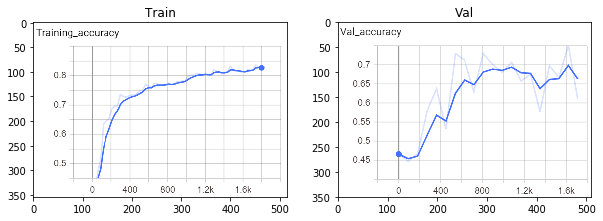

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
images=[]
images.append(cv2.imread(os.path.join(get_parent_dir(0),'MXNet_TrainAccuracy.png')))
images.append(cv2.imread(os.path.join(get_parent_dir(0),'MXNet_ValAccuracy.png')))
_,ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].title.set_text('Train Accuracy')
ax[1].title.set_text('Validation Accuracy')
show_img(images[0],ax[0],title='Train')
show_img(images[1],ax[1],title='Val')

## Comparison between MXNet Gluon and Pytorch models for detection of HITS scenario

The below provided Validation accuracy plots of Pytorch (left) and MXNet Gluon (right) model show that MXNet gluon model depicts a cleaner increase in validation accuracy reaching 0.80 after 18 epochs whereas Pytorch model gives a zigzag pattern of increase in validation accuracy reaching 0.57 after 20 epochs. The accuracy of MXNet model appears to be better for image classification as a result of comparison.

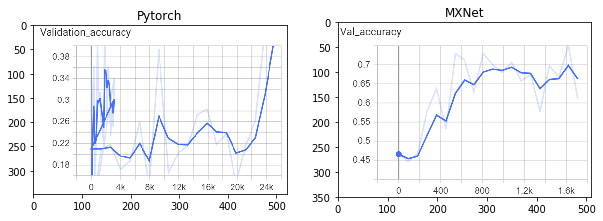

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
images=[]
images.append(cv2.imread(os.path.join(get_parent_dir(0),'Pytorch_ValAccuracy.png')))
images.append(cv2.imread(os.path.join(get_parent_dir(0),'MXNet_ValAccuracy.png')))


_,ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].title.set_text('Pytorch Accuracy')
ax[1].title.set_text('MXNet Accuracy')
show_img(images[0],ax[0],title='Pytorch')
show_img(images[1],ax[1],title='MXNet')

### Inference on test video using MXNet model

---
The test video file from the folder "Test" is split into frames and placed in "MXNetframes" folder. The video folder name and frames are then recorded in splits/test.txt file for further processing. The test.txt file is then referred and every frame listed in the file is detected which will be explained.


In [ ]:
#Convert the test video into frames in frame folder -
#test_path = glob.glob(os.path.join(get_parent_dir(0),"data", "Test", "*.mp4")) -- if directly applying the Hits algorithm on the test video
test_path = glob.glob(os.path.join(get_parent_dir(0),"data", "Test_Results", "*_detected.mp4")) # if yolo result is applied for the 2nd algorithm
frame_dir = glob.glob(os.path.join(get_parent_dir(0),"data", "MXNetframes"))
frame_path=[]
test_path, frame_dir


(['/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/Test_Results/Video10_detected.mp4'],
 ['/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/MXNetframes'])

In [ ]:

if len(test_path)>0:
  for i in range(len(test_path)):
    if(not os.path.exists(os.path.join(frame_dir[0],os.path.basename(test_path[i])))):
      frame_path1=video_to_frames(video_path=test_path[i], frames_dir=os.path.join(get_parent_dir(0),"data", "MXNetframes"), chunk_size=1000)


In [ ]:
frame_path=glob.glob(os.path.join(get_parent_dir(0),"data", "MXNetframes", "*_detected.mp4"))
frame_path

['/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/MXNetframes/Video10_detected.mp4']

In [ ]:

# Delete the contents of test.txt and enter the video name and frame number in splits/test.txt
file = open(os.path.join(get_parent_dir(0),"data", "splits", "test.txt"), 'r+')
print(os.path.join(get_parent_dir(0),"data", "splits", "test.txt"))
file. truncate(0)
file. close()




/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/splits/test.txt


In [ ]:
for videofile in frame_path:
  base = os.path.basename(videofile)
  filename = os.path.splitext(base)[0] # file name to be entered in test.txt
  testlist=[]
  for folder in os.listdir(videofile):
    imgpath=glob.glob(os.path.join(videofile,folder,"*.jpg"))
    for img in imgpath:
      imgfile=os.path.basename(img)
      testlist.append(filename + " "+ str(int(imgfile.split(".")[0])))
with open(os.path.join(get_parent_dir(0),"data", "splits", "test.txt"), 'a') as line:
  for test in testlist:
    line.write(test + "\n")
    print(test)
  line.close()

The test dataset is defined through the constructor of BAdmintonSet class which is our dataset class. The test transformations are applied and class balancing is not done as it is the test set. The dataloader is initialised and the best scoring trained weights are loaded for detection.

In [ ]:
batch_size = 8
test_set = BadmintonSet(split='test', transform=transform_test, every=every[2], padding=padding, stride=stride, model_id='0000',
                     balance=False, inference=True)

test_data = gluon.data.DataLoader(test_set, batch_size=batch_size,
                                      shuffle=False, num_workers=num_workers)

print('Testing best model from Epoch %d with score of %f' % (best_epoch, best_score))
model.load_parameters(os.path.join(MxNet_train_model, "{:04d}.params".format(best_epoch)))
print('Loaded model params: {}'.format(os.path.join(MxNet_train_model, "{:04d}.params".format(best_epoch))))



INFO:root:Loading data from /content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/splits/test.txt


Testing best model from Epoch 18 with score of 0.119350
Loaded model params: /content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/models/vision/experiments/0000/0018.params


In [ ]:
str_ = ""
tic = time.time()
results = detect_model(model, test_data, test_set, ctx)
str_ += '  # Samples: {}, Time Taken: {:.1f}'.format(len(test_set), time.time() - tic)
print(str_)

Evaluating:   0%|          | 0/186 [00:00<?, ?it/s]

loader length: 186


Evaluating: 100%|██████████| 186/186 [06:53<00:00,  2.22s/it]

  # Samples: 11874, Time Taken: 413.5


In [ ]:
MxNet_result_folder = os.path.join(get_parent_dir(0), "data", "Test_Results")
MxNet_result_folder
# os.path.join(Data_Folder)

'/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/Test_Results'

The results of detection/ classification is presented as a video with codes displayed for each class and highlighted accordingly when the player performs a hit, away or serve. The resultant video is saved in "Test_Results" as "results.mp4". Once the result video is placed in the path, the same can be viewed for assessment. While executing the complete code again, thevideo files in  Test_Results needs to transferred to "Saved_test_Results" backup folder since we need an empty folder for results to be placed. 

In [ ]:
visualise_events(test_set, results, video_path=os.path.join(get_parent_dir(0),"data","Test_Results", 'results.mp4'))

Generating Vis: 100%|██████████| 5937/5937 [02:08<00:00, 46.32it/s]


### Inference using Pytorch Model:


---

The same procedure is followed to infer the testdata using Pytorch model. The frames from video "*_detected.mp4" are extracted from the "Test" folder and processed using detection method and result is placed as "results_pytorch.mp4" in "Test_Results" folder. 

In [ ]:
batch_size = 8
test_set = BadmintonSet(split='test', transform=transform_test, every=every[2], padding=padding, stride=stride, model_id='0000',
                     balance=False, inference=True)

test_data = DataLoader(test_set, batch_size=batch_size,
                                      shuffle=False, num_workers=0)

densenet.load_state_dict(torch.load(PATH))

#densenet

I0602 08:53:42.963658 140567854454656 <ipython-input-18-257becfad477>:143] Loading data from /content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/splits/test.txt


<All keys matched successfully>

In [ ]:
str_ = ""
tic = time.time()
ctx = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#ctx= torch.device("cpu")
results = detect_model_pytorch(densenet, test_data, test_set, ctx)
str_ += '  # Samples: {}, Time Taken: {:.1f}'.format(len(test_set), time.time() - tic)
print(str_)

loader length: 743


  # Samples: 5937, Time Taken: 1543.3


In [ ]:
MxNet_result_folder = os.path.join(get_parent_dir(0), "data", "Test_Results")
MxNet_result_folder


'/content/gdrive/My Drive/Colab Notebooks/CV Project/Badminton Analysis Project/data/Test_Results'

The results of detection/ classification is presented as a video with codes displayed for each class and highlighted accordingly when the player performs a hit, away or serve. The resultant video is saved in "Test_Results" as "results_pytorch.mp4". Once the result video is placed in the path, the same can be viewed for assessment. While executing the complete code again, the video files in  Test_Results needs to transferred to "Saved_test_Results" backup folder since we need an empty folder for results to be placed. 

In [ ]:
visualise_events(test_set, results, video_path=os.path.join(get_parent_dir(0),"data","Test_Results", 'results_pytorch.mp4'))

# REFERENCES


* https://github.com/Microsoft/VoTT/releases

* https://www.kdnuggets.com/2018/05/implement-yolo-v3-object-detector-pytorch-part-1.html

* http://www.programmersought.com/article/6237642638/

* https://www.tensorflow.org/api_docs/python/tf/Tensor

* https://www.tensorflow.org/api_docs/python/tf/compat/v1/Session

* https://www.tensorflow.org/guide/migrate

* https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

* https://pytorch.org/hub/pytorch_vision_densenet/#:~:text=Model%20Description,1)%2F2%20direct%20connections.

* https://arxiv.org/abs/1608.06993

* https://www.analyticsvidhya.com/blog/2019/09/introduction-to-pytorch-from-scratch/

* https://towardsdatascience.com/what-is-pytorch-a84e4559f0e3

* https://www.infoworld.com/article/3318557/review-mxnet-deep-learning-shines-with-gluon.html 	

* https://mxnet.apache.org/api/python/docs/tutorials/packages/gluon/image/pretrained_models.html

* https://pjreddie.com/darknet/yolo/

* https://pytorch.org/tutorials/

* https://pytorch.org/docs/stable/torchvision/models.html

* https://blog.insightdatascience.com/how-to-train-your-own-yolov3-detector-from-scratch-224d10e55de2

* https://github.com/HaydenFaulkner/Tennis